# Telecom Customer Churn Prediction

# Contenidos <a id='back'></a>

* [1. Introducción](#intro)
    * [1.1 Descripción del proyecto](#description)
    * [1.2 Problemas](#problems)
    * [1.3 Objetivos](#objectives)
* [2. Metodología](#method)
* [3. Inicialización](#init)
* [4. Exploración de datos](#data_exploration)
    * [4.1 Conclusión](#exploration_conclusion)
* [5. Preprocesamiento de Datos](#data_preprocessing)
    * [5.1 Combinación de los Datasets](#merge)
    * [5.2 Resolución de Problemas Identificados en la Data Exploration](#solve_issues)
    * [5.3 Feature Engineering](#feature)
* [6. Exploratory Data Analysis (EDA)](#eda)
    * [6.1 Distribuciones de Pagos Mensuales para Clientes Activos y Clientes que Han Abandonado](#monthly_payment)
    * [6.2 Participación de Clientes por Tipo de Servicio](#service_type)
    * [6.3 Flujo de Clientes Entrantes y Salientes](#flows)
    * [6.4 Distribución de Variables Clave por Tipo de Servicio](#key_variables)
    * [6.5 Tasa de Abandono por Característica Categórica](#categorical_features)
    * [6.6 Coeficiente de Correlación entre Características Numéricas y Target](#correlation)
    * [6.7 Distribución de Características Numéricas por Target Class](#numerical_features)
    * [6.8 Distribution of Target Classes](#target_classes)
    * [6.9 Conclusión](#eda_conclusion)
* [7. Modelamiento](#modeling)
    * [7.1 Entrenamiento del Modelo](#train_model)
        * [7.1.1 Constant Model](#constant)
        * [7.1.2 Logistic Regression](#lr)
        * [7.1.3 Decision Tree](#dt)
        * [7.1.4 LightGBM](#lgbm)
        * [7.1.5 CatBoost](#cat)
        * [7.1.6 XGBoost](#xgb)
* [8. Evaluación del Modelo](#model_evaluation)
    * [8.1 Selección Final del Modelo](#final_model)
    * [8.2 Importancia de las Características](#feature_importances)
    * [8.3 Evaluación del Modelo Final en el Conjunto de Prueba](#test_evaluation)
* [9. Conclusiones Generales](#general_conclusion)
* [10. Recommendaciones](#recommendations)

## 1. Introducción <a id='intro'></a>

### 1.1 Descripción del proyecto <a id='description'></a>

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

Servicios de Interconnect:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, línea de abonado digital) o a través de un cable de fibra óptica. Algunos otros servicios que ofrece la empresa incluyen:
    - Seguridad en Internet: software antivirus (ProtecciónDeDispositivo) y un bloqueador de sitios web maliciosos (SeguridadEnLínea).
    - Una línea de soporte técnico (SoporteTécnico).
    - Almacenamiento de archivos en la nube y backup de datos (BackupOnline)
    - Streaming de TV (StreamingTV) y directorio de películas (StreamingPelículas)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### 1.2 Problemas <a id='problems'></a>

Este proyecto tiene como objetivo resolver los siguientes problemas.

- ¿Cuáles son algunos rasgos o patrones comunes entre aquellos que han dejado el servicio?
- ¿Qué tan precisa puede ser la predicción de la deserción de clientes con un modelo de aprendizaje automático?

### 1.3 Objetivos <a id='objectives'></a>

Para resolver los problemas mencionados anteriormente, los objetivos de este proyecto son:

1. Identificar las características y comportamientos que distinguen a los clientes activos de aquellos que son propensos a abandonar el servicio.
2. Desarrollar un modelo de aprendizaje automático para predecir la deserción de clientes con un puntaje AUC-ROC de al menos 0.85.

[Volver a los contenidos](#back)

## 2. Metodología <a id='method'></a>

Las características y comportamientos de los clientes serán analizados y evaluados para identificar los factores que contribuyen a la deserción de clientes. La predicción de un cliente que se va es una tarea de aprendizaje automático supervisado, por lo que se desarrollarán varios modelos de clasificación.

## 3. Inicialización <a id='init'></a>

In [1]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np
from functools import reduce
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import time
from tqdm.auto import tqdm

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Classification Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Model selection and evalution
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import optuna

# Model saving
import os
import pickle

# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

# Produce graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

[Back to Contents](#back)

## 4. Data Exploration <a id='data_exploration'></a>

El equipo de marketing del operador de telecomunicaciones Interconnect nos ha proporcionado cuatro conjuntos de datos que incluyen:

- `contract.csv` - información del contrato
- `personal.csv` - datos personales del cliente
- `internet.csv` - información sobre los servicios de Internet
- `phone.csv` - información sobre los servicios telefónicos

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente.

La información del contrato es válida a partir del *1 de febrero de 2020*.

In [2]:
# Cargar los datasets

base_path = "C:/Users/Alejandro/Desktop/final_provider"

df_contract = pd.read_csv(f"{base_path}/contract.csv")
df_personal = pd.read_csv(f"{base_path}/personal.csv")
df_internet = pd.read_csv(f"{base_path}/internet.csv")
df_phone = pd.read_csv(f"{base_path}/phone.csv")

print('Todos los datasets han sido cargados exitosamente')

Todos los datasets han sido cargados exitosamente


**`contract`**

In [3]:
# Echamos un vistazo a las 5 primeras filas
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
# Chequeamos la forma del dataset
df_contract.shape

(7043, 8)

En el DataFrame `contract`, hay 7043 filas (clientes) y 8 columnas con información relacionada con el contrato de cada cliente.

**Descripción de los datos**

- `customerID`: Un identificador único para el cliente.
- `BeginDate`: La fecha en la que el cliente comenzó a utilizar el/los servicio(s).
- `EndDate`: La fecha en la que el cliente terminó el servicio. Un valor de `No` indica que el cliente aún está usando el/los servicio(s) en el momento en que se extrajo la información (1 de febrero de 2020).
- `Type`: El tipo de contrato (por ejemplo: mes a mes, un año, etc.).
- `PaperlessBilling`: Un valor binario que indica si el cliente ha optado por la facturación sin papel.
- `PaymentMethod`: El método para realizar los pagos del/los servicio(s) suscrito(s) (por ejemplo: cheque electrónico, cheque por correo, etc.).
- `MonthlyCharges`: El monto cobrado al cliente de manera mensual.
- `TotalCharges`: El monto acumulado cobrado al cliente durante toda la duración de la suscripción.

**Problemas y Soluciones**

- Los nombres de las columnas están en `camel case`, los convertiremos a `snake case`.
- La columna `EndDate` tiene valores `No` que no son fechas. Estos valores se reemplazarán con `None` y se creará una columna adicional `churn` para indicar si un cliente ha abandonado el servicio.

In [5]:
# Veamos si existen duplicados
df_contract.duplicated().sum()

0

In [6]:
# Veamos si existen valores ausentes
df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [7]:
# Revisamos los tipos de datos
df_contract.dtypes

customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

El DataFrame no posee valores duplicados o valores ausentes

**Problemas y Soluciones**

-  Los tipos de datos para `BeginDate` y `EndDate` son incorrectos y se convertirán en `datetime`.
-  La columna `TotalCharges` debería tener un tipo de dato `float`. Esto indica que hay algunos valores no numéricos en la columna. Vamos a identificar estos valores no numéricos y reemplazarlos en consecuencia para que podamos convertir el tipo de dato a `float`.

In [8]:
# Veamos el resumen estadístico
df_contract.describe(include='all')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


No se observan valores atípicos o anomalías evidentes, excepto en la columna `TotalCharges`. Vamos a revisar los 11 valores no numéricos en la columna `TotalCharges`.

In [9]:
# Revisamos las 11 filas con valores no numéricos en la columna `TotalCharges`
df_contract.query('TotalCharges == " "')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Se puede observar que todas estas 11 filas tienen una `BeginDate` de `2020-02-01` y un `EndDate` de `No`. Esto sugiere que estos clientes son nuevos y aún no han realizado ningún pago. Por lo tanto, se reemplazarán con `0`.

Hemos adquirido una comprensión básica del conjunto de datos `contract`. A continuación, procederemos con el conjunto de datos `personal`.

**`personal`**

In [10]:
# Echemos un vistazo a las primeras 5 filas
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [11]:
# Veamos la forma del DataFrame
df_personal.shape

(7043, 5)

En el `personal` dataset, hay 7043 filas (clientes) y 5 columnas con información relacionada con cada cliente. El número de filas de `7043` coincide con el número total de filas en el `contract` dataset.

**Descripción de los datos**

- `customerID`: Un identificador único para el cliente.
- `gender`: El género del cliente (por ejemplo: femenino, masculino).
- `SeniorCitizen`: Un valor binario que indica si el cliente es un ciudadano senior.
- `Partner`: Un valor binario que indica si el cliente tiene pareja.
- `Dependents`: Un valor binario que indica si el cliente tiene dependientes, como hijos u otras personas que dependen de él financieramente.

**Problema y Solución**

- De manera similar, convertiremos los nombres de las columnas a `snake case`.

In [12]:
# Veamos si existen valores duplicados
df_personal.duplicated().sum()

0

In [13]:
# Revisemos si existen valores ausentes
df_personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [14]:
# Veamos los tipos de datos
df_personal.dtypes

customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

No hay valores duplicados ni faltantes. Los tipos de datos también son correctos.

In [15]:
# Veamos el resumen estadístico del dataset
df_personal.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


No se encuentran anomalías ni valores atípicos evidentes.

Pasamos al `internet` dataset.

**`internet`**

In [16]:
# Check the first five rows
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [17]:
# Revisemos la forma del dataset
df_internet.shape

(5517, 8)

Hay 5517 clientes que han utilizado o están utilizando el servicio de internet.

**Descripción de los datos**

- `customerID`: Un identificador único para el cliente.
- `InternetService`: El tipo de servicio de internet al que está suscrito el cliente (por ejemplo: DSL, fibra óptica).
- `OnlineSecurity`: Un valor binario que indica si el cliente tiene la función de seguridad en línea para la conexión a internet.
- `OnlineBackup`: Un valor binario que indica si el cliente tiene el servicio de copia de seguridad en línea para los datos.
- `DeviceProtection`: Un valor binario que indica si el cliente tiene el servicio de protección de dispositivos para el dispositivo conectado.
- `TechSupport`: Un valor binario que indica si el cliente tiene acceso al servicio de soporte técnico.
- `StreamingTV`: Un valor binario que indica si el cliente se ha suscrito al servicio de transmisión de TV.
- `StreamingMovies`: Un valor binario que indica si el cliente se ha suscrito al servicio de transmisión de películas.

**Problema y Solución**

- Los nombres de las columnas se convertirán a snake case.

In [18]:
# Chequeamos si existen valores duplicados
df_internet.duplicated().sum()

0

In [19]:
# Veamos si existen valores ausentes
df_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [20]:
# Revisemos el tipo de datos
df_internet.dtypes

customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

No hay valores faltantes ni duplicados y todos los tipos de datos son correctos.

In [21]:
# Revisemos el resumen estadístico
df_internet.describe(include='all')

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


No se detecta ninguna anomalía evidente.

Procedamos con el conjunto de datos final.

**`phone`**

In [22]:
# Echemos un vistazo a las 5 primeras filas del dataset
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [23]:
# Revisemos la forma del dataset
df_phone.shape

(6361, 2)

Hay 6361 clientes que han utilizado o están utilizando el servicio de comunicación por línea fija.

**Descripción de los datos**

- `customerID`: Un identificador único para el cliente.
- `MultipleLines`: Un valor binario que indica si el cliente se ha suscrito a múltiples líneas.

**Problemas y Soluciones**

- Los nombres de las columnas se convertirán a `snake case`.

In [24]:
# Revisenmos si existen valores duplicados
df_phone.duplicated().sum()

0

In [25]:
# Veamos si existen valores ausentes
df_phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [26]:
# Revisemos los tipos de datos
df_phone.dtypes

customerID       object
MultipleLines    object
dtype: object

No hay valores duplicados ni faltantes y todos los tipos de datos son correctos.

In [27]:
# Revisemos el resumen estadístico
df_phone.describe(include='all')

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


No se encuentran anomalías.

### 4.1 Conclusión <a id='exploration_conclusion'></a>

1. Los cuatro conjuntos de datos contienen información de 7043 clientes. La información incluye detalles sobre el contrato, datos personales y los tipos de servicios a los que se han suscrito.
2. Se han identificado varios problemas, que son los siguientes:
    - Todos los nombres de las columnas están en camel case, se convertirán a snake case.
    - La columna `EndDate` tiene algunos valores de `No` que no son fechas. Estos valores se reemplazarán con `None` y se creará una columna adicional `churn` para indicar si un cliente ha abandonado el servicio.
    - La columna `TotalCharges` tiene valores no numéricos que indican que los clientes son nuevos. Por lo tanto, estos valores se reemplazarán con `0`.
    - Los tipos de datos de `BeginDate`, `EndDate` y `TotalCharges` son incorrectos y se ajustarán en consecuencia.
  
[Volver a los contenidos](#back)

## 5. Preprocesamiento de Datos <a id='data_preprocessing'></a>

### 5.1 Combinación de los Datasets <a id='merge'></a>

En primer lugar, los cuatro conjuntos de datos se combinarán en uno solo basado en la columna común `customerID`.

In [28]:
# Combinamos los 4 Datasets
df_all = reduce(lambda left, right: left.merge(right, on='customerID', how='left'),
                [df_contract, df_personal, df_internet, df_phone])

In [29]:
# Chequeamos el Dataset combinado
df_all.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [30]:
# Verificamos si el número de filas es 7043
df_all.shape

(7043, 20)

In [31]:
# Veamos si existen valores ausentes
df_all.isna().sum().nlargest(10)

InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
customerID             0
BeginDate              0
dtype: int64

Estos valores faltantes se deben al hecho de que no todos los clientes se han suscrito a ambos servicios, `internet` y `phone`. Por lo tanto, rellenaremos estos valores faltantes con `not_subscribed`.

In [32]:
# Obtenemos las columnas con valores faltantes.
na_columns = [col for col in df_all.columns if df_all[col].isna().sum() > 0]

In [33]:
# Rellenamos los valores faltantes con `not_subscribed`.
df_all[na_columns] = df_all[na_columns].fillna('not_subscribed')

# Verificamos los valores únicos en estas columnas
for col in na_columns:
    display(df_all[col].value_counts())
    print()

InternetService
Fiber optic       3096
DSL               2421
not_subscribed    1526
Name: count, dtype: int64

OnlineSecurity
No                3498
Yes               2019
not_subscribed    1526
Name: count, dtype: int64

OnlineBackup
No                3088
Yes               2429
not_subscribed    1526
Name: count, dtype: int64

DeviceProtection
No                3095
Yes               2422
not_subscribed    1526
Name: count, dtype: int64

TechSupport
No                3473
Yes               2044
not_subscribed    1526
Name: count, dtype: int64

StreamingTV
No                2810
Yes               2707
not_subscribed    1526
Name: count, dtype: int64

StreamingMovies
No                2785
Yes               2732
not_subscribed    1526
Name: count, dtype: int64

MultipleLines
No                3390
Yes               2971
not_subscribed     682
Name: count, dtype: int64

Los conjuntos de datos se han combinado con éxito. A continuación, abordaremos los problemas mencionados en la etapa anterior.

[Volver a los contenidos](#back)

### 5.2 Resolución de Problemas Identificados en la Data Exploration <a id='solve_issues'></a>

**Convertimos los Nombres de las Columnas a `Snakecase`**

In [34]:
# Convertimos los nombres de las columnas en `snakecase`
df_all.columns = [re.sub(r'([A-Z])', r' \1', col).lower().strip().replace(' ', '_') for col in df_all.columns]

In [35]:
# Verificamos los nombres de las columnas
df_all.columns

Index(['customer_i_d', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'multiple_lines'],
      dtype='object')

Los nombres de las columnas ahora están en `snakecase`, pero debemos hacer algunas correcciones para las columnas `customer_i_d` y `streaming_t_v`.

In [36]:
# Corregimos los nombres de `customer_i_d` y `streaming_t_v`
df_all.rename(columns={
    'customer_i_d': 'customer_id',
    'streaming_t_v': 'streaming_tv'
}, inplace=True)

# Finalmente verificamos los nombres de las columnas
df_all.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

**Creamos la variable `target`**

Para predecir si un cliente abandonará el servicio, necesitamos una variable `target`. Se creará una columna adicional `churn` utilizando la columna `end_date`. Los valores `No` indican que los clientes aún están activos, mientras que los otros valores de fecha indican la fecha en que el servicio terminó para aquellos que se han ido.

In [37]:
# Creamos la variagle `target` `churn` usando la columna `end_date`
df_all['churn'] = df_all['end_date'].map(lambda date: 0 if date == 'No' else 1)

# Chequeamos si la columna se ha creado correctamente
df_all[['end_date', 'churn']].head()

,end_date,churn
0,No,0
1,No,0
2,2019-12-01 00:00:00,1
3,No,0
4,2019-11-01 00:00:00,1


**Convertimos los tipos de datos**

Debemos reemplazar el valor `No` en `end_date` con `None` y ` ` en `total_charges` con `0` antes de realizar la conversión.

In [38]:
# Reemplazamos el valor `No` en `end_date` con `None`
df_all['end_date'].replace('No', np.nan, inplace=True)

# Verificamos si los cambios se han realizado
df_all['end_date'].head()

0                    NaN
1                    NaN
2    2019-12-01 00:00:00
3                    NaN
4    2019-11-01 00:00:00
Name: end_date, dtype: object

In [39]:
# Reemplazamos los valores en blanco en `total_charges` con `0`
df_all['total_charges'].replace(' ', 0, inplace=True)

# Verificamos si hay 11 filas con 0 en `total_charges`
len(df_all.query('total_charges == 0'))

11

In [40]:
# Convertimos los tipos de datos
df_all['begin_date'] = pd.to_datetime(df_all['begin_date'], format='%Y-%m-%d')
df_all['end_date'] = pd.to_datetime(df_all['end_date'], format='%Y-%m-%d %H:%M:%S')
df_all['total_charges'] = df_all['total_charges'].astype(float)

In [41]:
# Finalmente verificamos los tipos de datos
df_all.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date             datetime64[ns]
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges               float64
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
internet_service             object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
multiple_lines               object
churn                         int64
dtype: object

Los tipos de datos son correctos.

Se sospecha que los `monthly_charges` de Febrero del 2020 no se han añadido al `total_charges`, ya que los 11 nuevos clientes no tienen ningún registro de pago en `total_charges`. Si este es el caso, añadiremos los `monthly_charges` al `total_charges` para los clientes activos.

In [42]:
# Verificamos el primer registro en el Dataset
df_all.loc[0, ['begin_date', 'end_date', 'monthly_charges', 'total_charges']]

begin_date         2020-01-01 00:00:00
end_date                           NaT
monthly_charges                  29.85
total_charges                    29.85
Name: 0, dtype: object

El cliente debería ser facturado por dos meses, pero el `total_charges` solo refleja un mes de facturación, lo que verifica la especulación.

In [43]:
# Antes de agregar 'monthly_charges' chequeamos el Dataset
df_all[['churn', 'monthly_charges', 'total_charges']].head()

,churn,monthly_charges,total_charges
0,0,29.85,29.85
1,0,56.95,1889.50
2,1,53.85,108.15
3,0,42.30,1840.75
4,1,70.70,151.65


In [44]:
# Añadimos `monthly_charges` a los clientes existentes
df_all['total_charges'] = (df_all['total_charges'] + df_all['monthly_charges']) \
                          .where(df_all['churn'] == 0, df_all['total_charges'])

In [45]:
# Verificamos el conjunto de datos después de la adición de `monthly_charges`
df_all[['churn', 'monthly_charges', 'total_charges']].head()

,churn,monthly_charges,total_charges
0,0,29.85,59.70
1,0,56.95,1946.45
2,1,53.85,108.15
3,0,42.30,1883.05
4,1,70.70,151.65


[Volver a los contenidos](#back)

### 5.3 Feature Engineering <a id='feature'></a>

En esta sección, se crearán algunas características adicionales a partir de las existentes para mejorar el rendimiento del modelo. La relación entre las características adicionales y la deserción de clientes se examinará en la etapa de EDA.

**`subscribed_days`** y **`subscribed_years`**

Por lo general, cuanto mayor es la duración de la suscripción, mayor es la lealtad del cliente. Por lo tanto, estas características podrían ayudar a predecir la deserción de clientes.

Para encontrar el total de días de suscripción:
- Clientes que han abandonado: Restamos `begin_date` de `end_date` y extraemos el valor `day`.
- Clientes activos: Restamos `begin_date` de `2020-02-01` y extraemos el valor `day`.

Para encontrar el total de años de suscripción:
- Clientes que han abandonado: Restamos el año de `begin_date` del año de `end_date`.
- Clientes activos: Restamos el año de `begin_date` del año 2020.

In [46]:
# Creamos el valor de datetime en que se extrajo la información
extract_date = pd.to_datetime('2020-02-01', format='%Y-%m-%d')

# Calculamos el total de días de suscripción
df_all['subscribed_days'] = (df_all['end_date'] - df_all['begin_date']) \
                            .where(df_all['churn'] == 1, extract_date - df_all['begin_date']) \
                            .dt.days

In [47]:
# Calculamos el total de años de suscripción
df_all['subscribed_years'] = (df_all['end_date'].dt.year - df_all['begin_date'].dt.year) \
                             .where(df_all['churn'] == 1, 2020 - df_all['begin_date'].dt.year)

In [48]:
# Verificamos las columnas `subscribed_days` y `subscribed_years`
df_all[['churn', 'begin_date', 'end_date', 'subscribed_days', 'subscribed_years']].head()

,churn,begin_date,end_date,subscribed_days,subscribed_years
0,0,2020-01-01,NaT,31,0.0
1,0,2017-04-01,NaT,1036,3.0
2,1,2019-10-01,2019-12-01,61,0.0
3,0,2016-05-01,NaT,1371,4.0
4,1,2019-09-01,2019-11-01,61,0.0


**`subscribed_services`** y **`total_internet_services`**

Cuantos más servicios suscritos tenga un cliente, mayor será su dependencia del operador de telecomunicaciones, lo que hace que sea menos probable que deje la empresa.

- `subscribed_service`: Tipo de servicio suscrito.
- `total_internet_services`: Número total de servicios de o`nline_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv` y `streaming_movies`.

In [49]:
# Definimos una función para calcular `total_services` para cada cliente.
def assign_service_type(row):
    '''
    Asignamos el tipo de servicio suscrito por cliente.
    '''
    if row['internet_service'] != 'not_subscribed' and row['multiple_lines'] == 'not_subscribed':
        return 'internet_service'
    elif row['internet_service'] == 'not_subscribed' and row['multiple_lines'] != 'not_subscribed':
        return 'landline_communication'
    else:
        return 'both'

In [50]:
# Asignamos `subscribed_services`
df_all['subscribed_service'] = df_all.apply(assign_service_type, axis=1)

In [51]:
# Echamos un vistazo a la columna `subscribed_services`
df_all[['internet_service', 'multiple_lines', 'subscribed_service']].head()

,internet_service,multiple_lines,subscribed_service
0,DSL,not_subscribed,internet_service
1,DSL,No,both
2,DSL,No,both
3,DSL,not_subscribed,internet_service
4,Fiber optic,No,both


In [52]:
# Creamos una lista de los servicios de internet proporcionados por el operador
internet_services = ['online_security', 'online_backup', 'device_protection',
                     'tech_support', 'streaming_tv', 'streaming_movies']

# Definimos una función para calcular `total_internet_services` para cada cliente
def calc_total_internet_services(row):
    '''
    Calculamos y devolvemos el número total de servicios de internet suscritos por un cliente.
    '''
    count = 0

    for service in internet_services:
        if row[service] == 'Yes':
            count += 1

    return count

In [53]:
# Calculamos `total_internet_services`
df_all['total_internet_services'] = df_all.apply(calc_total_internet_services, axis=1)

In [54]:
# Echamos un vistazo a la columna `total_internet_services` 
df_all[internet_services + ['total_internet_services']].sample(5)

,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,total_internet_services
2213,not_subscribed,not_subscribed,not_subscribed,not_subscribed,not_subscribed,not_subscribed,0
3639,No,No,Yes,No,Yes,Yes,3
1376,No,No,Yes,No,Yes,Yes,3
4476,not_subscribed,not_subscribed,not_subscribed,not_subscribed,not_subscribed,not_subscribed,0
6688,not_subscribed,not_subscribed,not_subscribed,not_subscribed,not_subscribed,not_subscribed,0


Hemos terminado con la etapa de preprocesamiento de datos, ahora comencemos a analizar los datos.

[Volver a los contenidos](#back)

## 6. Exploratory Data Analysis (EDA) <a id='eda'></a>

La función a continuación automatizará las tareas en esta etapa.

In [55]:
def plot_filled_bar_chart(data, x, title, legend=True):
    '''
    Plot a filled bar chart to show the distribution of active customers 
    and customer who have left given a feature
    '''
    palette = ['steelblue', 'tomato']
    sns.histplot(data=data, x=x, hue='churn', multiple='fill', discrete=True, 
                 palette=palette, legend=legend, ax=ax)
    ax.set_title(title, fontweight='bold', y=1.0)
    ax.set_xlabel('')    
    ax.set_ylabel('Percentage', fontweight='bold')
    ax.set_yticks(np.linspace(0, 1, 6), np.arange(0, 101, 20))
    
    if legend == True:
        legend_labels = ['active', 'left']
        legend_handles = [Line2D([0], [0], color=palette[0], lw=3),
                          Line2D([0], [0], color=palette[1], lw=3)]
        ax.legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

---

### 6.1 Distribuciones de Pagos Mensuales para Clientes Activos y Clientes que Han Abandonado <a id='monthly_payment'></a>

In [56]:
# Calculamos las estadísticas descriptivas del pago mensual
stats = pd.concat([
    df_all.query('churn == 0')['monthly_charges'].describe(),
    df_all.query('churn == 1')['monthly_charges'].describe()
], axis=1).round(2)

stats.columns = ['active', 'left']

stats

,active,left
count,5174.00,1869.00
mean,61.27,74.44
std,31.09,24.67
min,18.25,18.85
25%,25.10,56.15
50%,64.43,79.65
75%,88.40,94.20
max,118.75,118.35


A partir de las estadísticas descriptivas, se puede concluir que:

- Los clientes que han abandonado tienen un pago mensual medio más alto de 74.44, en comparación con el pago mensual medio de los clientes activos, que es de 61.27.
- Ambos grupos tienen pagos mensuales mínimos y máximos casi idénticos. Sin embargo, el percentil 25, 50 y 75 de los clientes que han abandonado son significativamente más altos que los de los clientes activos.

El resultado anterior implica que la distribución de pagos mensuales de los clientes que han abandonado está más sesgada a la izquierda que la de los clientes activos, es decir, los clientes activos tienen pagos mensuales más bajos. Vamos a trazar algunos gráficos para visualizarlo.

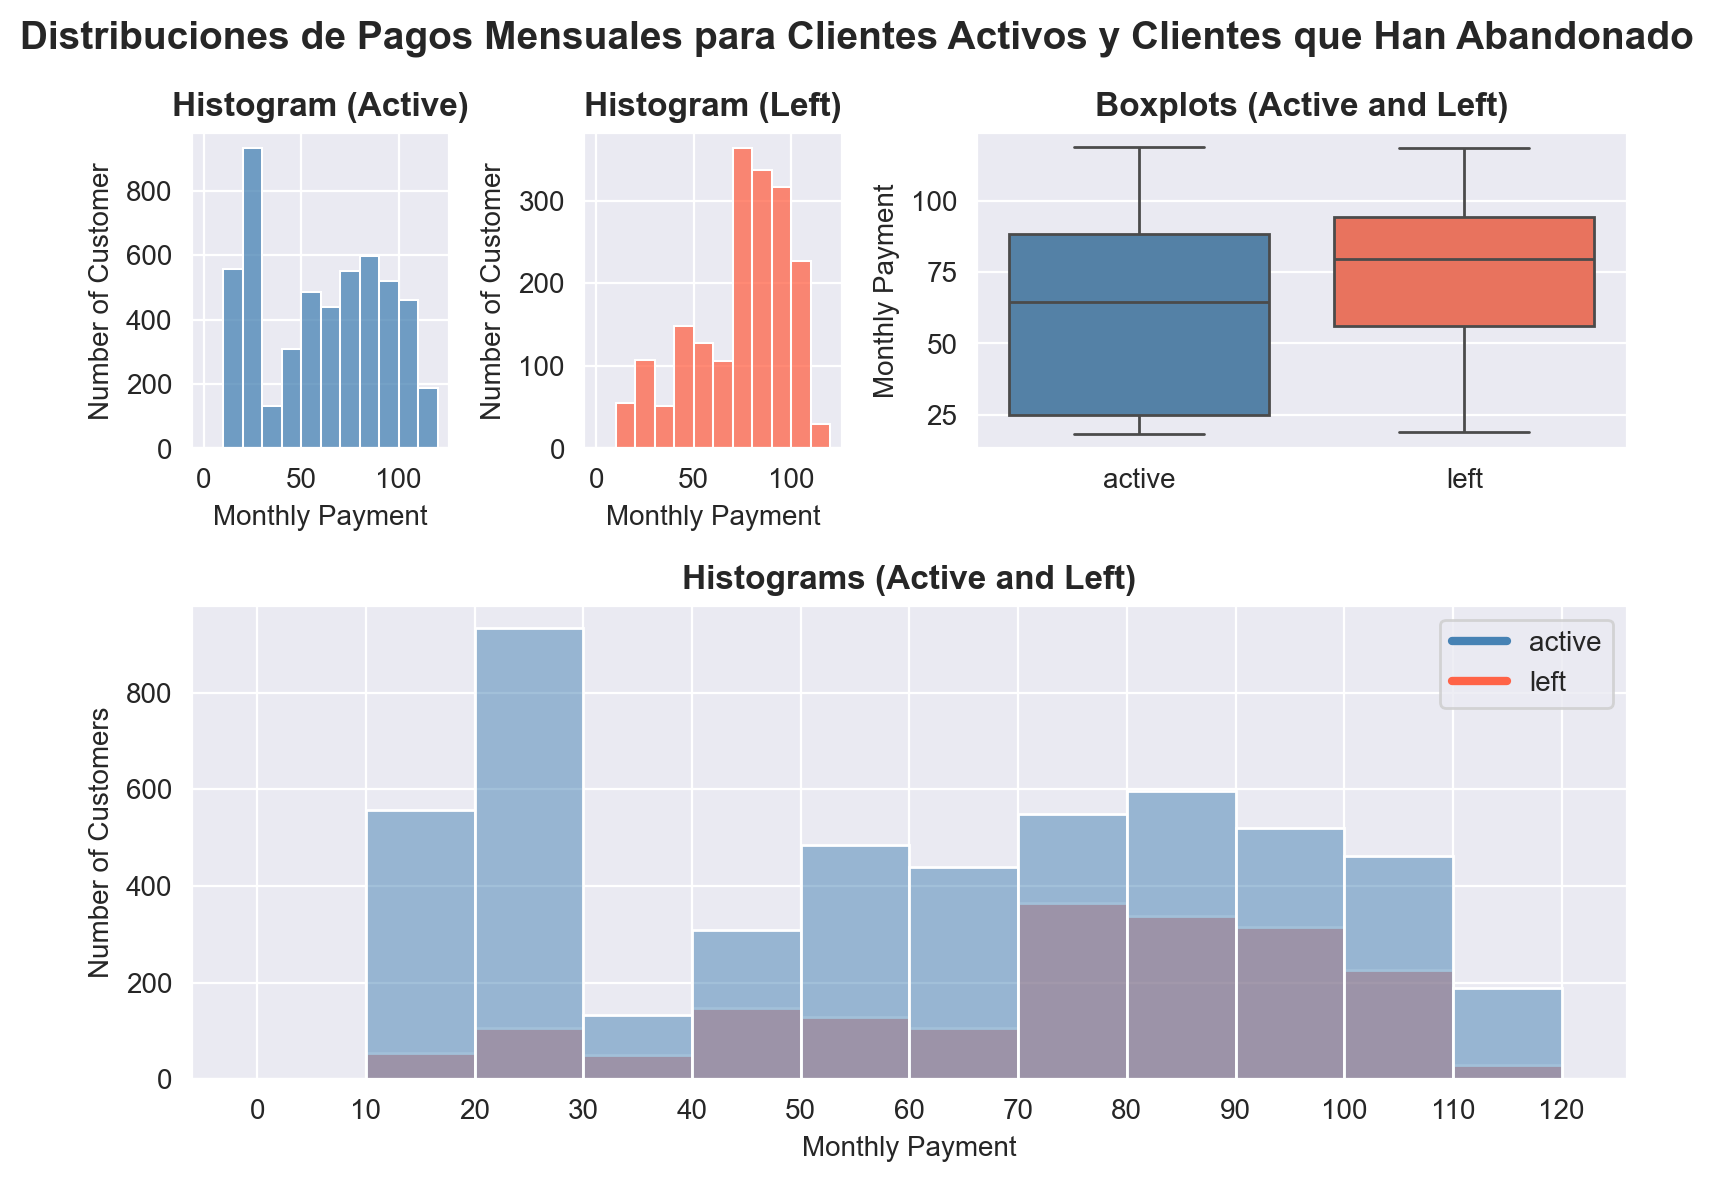

In [137]:
# Graficamos histogramas y diagramas de caja (boxplots) para visualizar las distribuciones.
sns.set_style('darkgrid')

layout = '''
    abcc
    dddd
'''

fig, axd = plt.subplot_mosaic(layout, height_ratios=[1.0, 1.5], figsize=(8, 6))

fig.suptitle('Distribuciones de Pagos Mensuales para Clientes Activos y Clientes que Han Abandonado',
             fontsize=14, fontweight='bold')

# Graficamos el histograma para cada grupo
ax = axd['a']
sns.histplot(data=df_all.query('churn == 0'), x='monthly_charges', color='steelblue', 
             bins=np.arange(0, 121, 10), ax=ax)
ax.set_title('Histogram (Active)', fontweight='bold')
ax.set_xlabel('Monthly Payment')
ax.set_ylabel('Number of Customer')

ax = axd['b']
sns.histplot(data=df_all.query('churn == 1'), x='monthly_charges', color='tomato', 
             bins=np.arange(0, 121, 10), ax=ax)
ax.set_title('Histogram (Left)', fontweight='bold')
ax.set_xlabel('Monthly Payment')
ax.set_ylabel('Number of Customer')

# Graficamos los diagramas de caja (boxplots)
ax = axd['c']
sns.boxplot(data=df_all, x='churn', y='monthly_charges', hue='churn',
            palette=['steelblue', 'tomato'], legend=None, ax=ax)
ax.set_title('Boxplots (Active and Left)', fontweight='bold')
ax.set_xticks([0, 1], ['active', 'left'])
ax.set_xlabel('')
ax.set_ylabel('Monthly Payment')

# Graficamos los histogramas en el mismo subgráfico
ax = axd['d']
sns.histplot(data=df_all, x='monthly_charges', hue='churn', bins=np.arange(0, 121, 10),
             palette=['steelblue', 'tomato'], ax=ax)
legend_labels = ['active', 'left']
legend_handles = [Line2D([0], [0], color='steelblue', lw=3),
                  Line2D([0], [0], color='tomato', lw=3)]
ax.set_title('Histograms (Active and Left)', fontweight='bold')
ax.set_xlabel('Monthly Payment')
ax.set_ylabel('Number of Customers')
ax.set_xticks(np.arange(0, 121, 10), np.arange(0, 121, 10))
ax.legend(legend_handles, legend_labels, loc='upper right')

plt.tight_layout()
plt.show()

A partir de los boxplots, se puede observar que los clientes que se han ido tienen un pago mensual más alto que los clientes activos.

A partir de los histogramas, los clientes pueden dividirse en cuatro grupos basados en el pago mensual: `0 a 40`, `40 a 70`, `70 a 110` y `110 y más`. El grupo con un pago mensual de `70 a 110` tiene la tasa de cancelación más alta.

In [58]:
# Calculamos la tasa de cancelación para cada grupo de pago mensual
mc_group = pd.cut(
    df_all['monthly_charges'],
    bins=[0, 40, 70, 110, 120],
    labels=['0-40', '40-70', '70-110', '110 and above']
).to_frame()

mc_group['churn'] = df_all['churn']

pivot = mc_group.pivot_table(
    index='monthly_charges',
    columns='churn',
    aggfunc='size'
)

pivot_perc = (pivot.div(pivot.sum(axis=1), axis=0) * 100).round(2)

pivot_perc

churn,0,1
monthly_charges,,
0-40,88.36,11.64
40-70,76.08,23.92
70-110,63.21,36.79
110 and above,86.98,13.02


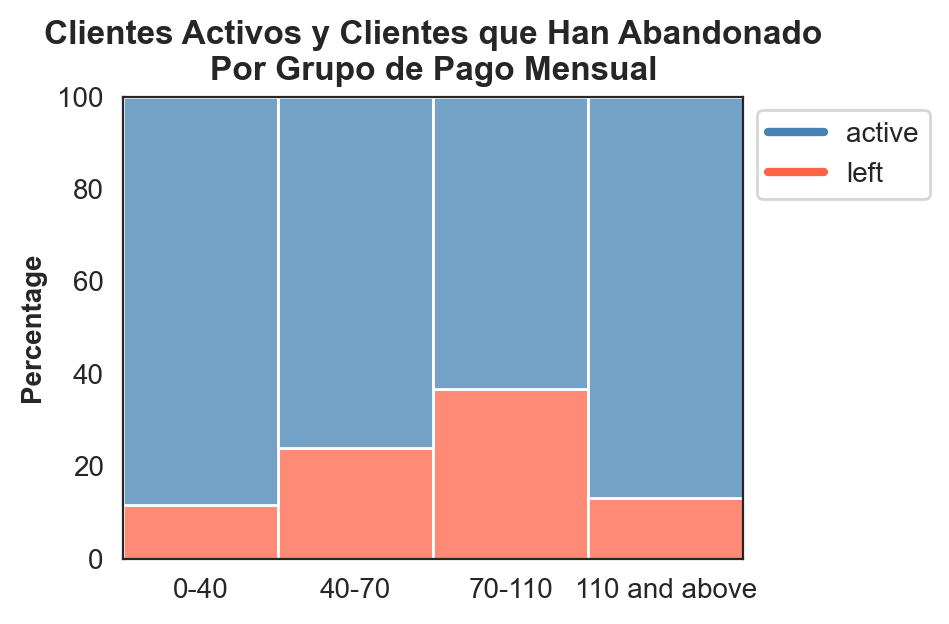

In [136]:
# Graficamos
sns.set_style('white')
plt.figure(figsize=(4, 3))

ax = plt.gca()
plot_filled_bar_chart(data=mc_group,
                      x='monthly_charges',
                      title='Clientes Activos y Clientes que Han Abandonado\nPor Grupo de Pago Mensual')

plt.show()

Los clientes que pagan entre `70-110` al mes tienen la tasa de cancelación más alta del `36.79%`. El departamento de marketing podría centrarse más en este grupo y desarrollar estrategias relevantes para retener a los clientes.

[Volver a los contenidos](#back)

### 6.2 Participación de Clientes por Tipo de Servicio <a id='service_type'></a>

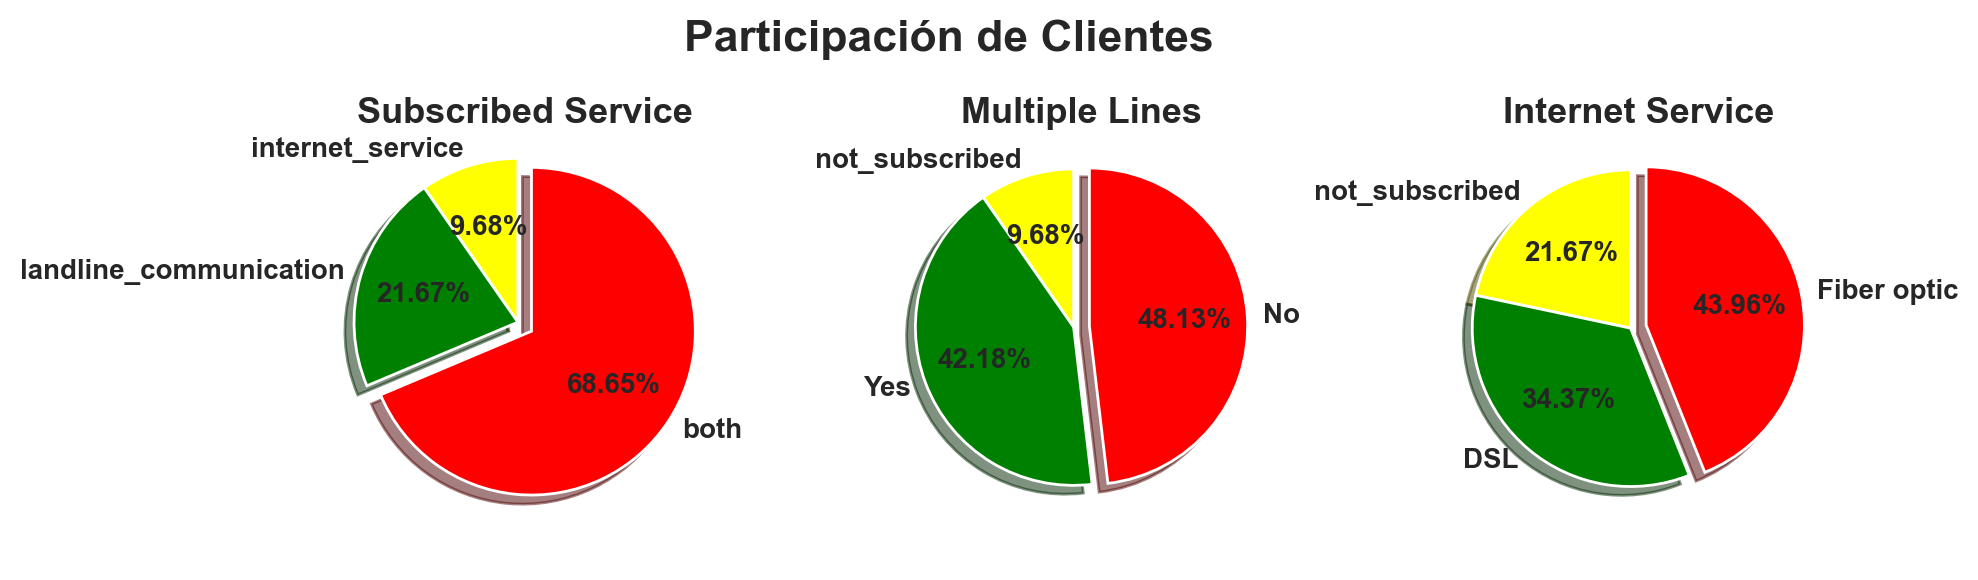

In [135]:
# Dibujamos gráficos de pie
colors = ['yellow', 'green', 'red']
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

fig.suptitle('Participación de Clientes', x=0.48, y=0.95, fontsize=16, fontweight='bold')

for i, col in enumerate(['subscribed_service', 'multiple_lines', 'internet_service']):
    ax = axs[i]
    df_t = df_all[col].value_counts().sort_values()
    ax.pie(df_t, labels=df_t.index, autopct='%1.2f%%', startangle=90, shadow=True,
           explode=(0, 0, 0.1), colors=colors, textprops={'fontweight': 'bold'})
    ax.axis('equal')
    title = ' '.join([word.capitalize() for word in col.split('_')])
    ax.set_title(title, fontsize=13, fontweight='bold', y=0.9)

plt.tight_layout()
plt.show()

A partir de los gráficos de pie, podemos concluir que:

- El `68.65%` de los clientes están suscritos a ambos servicios.
- Para los usuarios del servicio de comunicación por línea fija, hay más personas que eligen no usar múltiples líneas, aunque la diferencia no es significativa.
- Para los usuarios del servicio de internet, la fibra óptica es más popular que el DSL.

[Volver a los contenidos](#back)

### 6.3 Flujo de Clientes Entrantes y Salientes <a id='flows'></a>

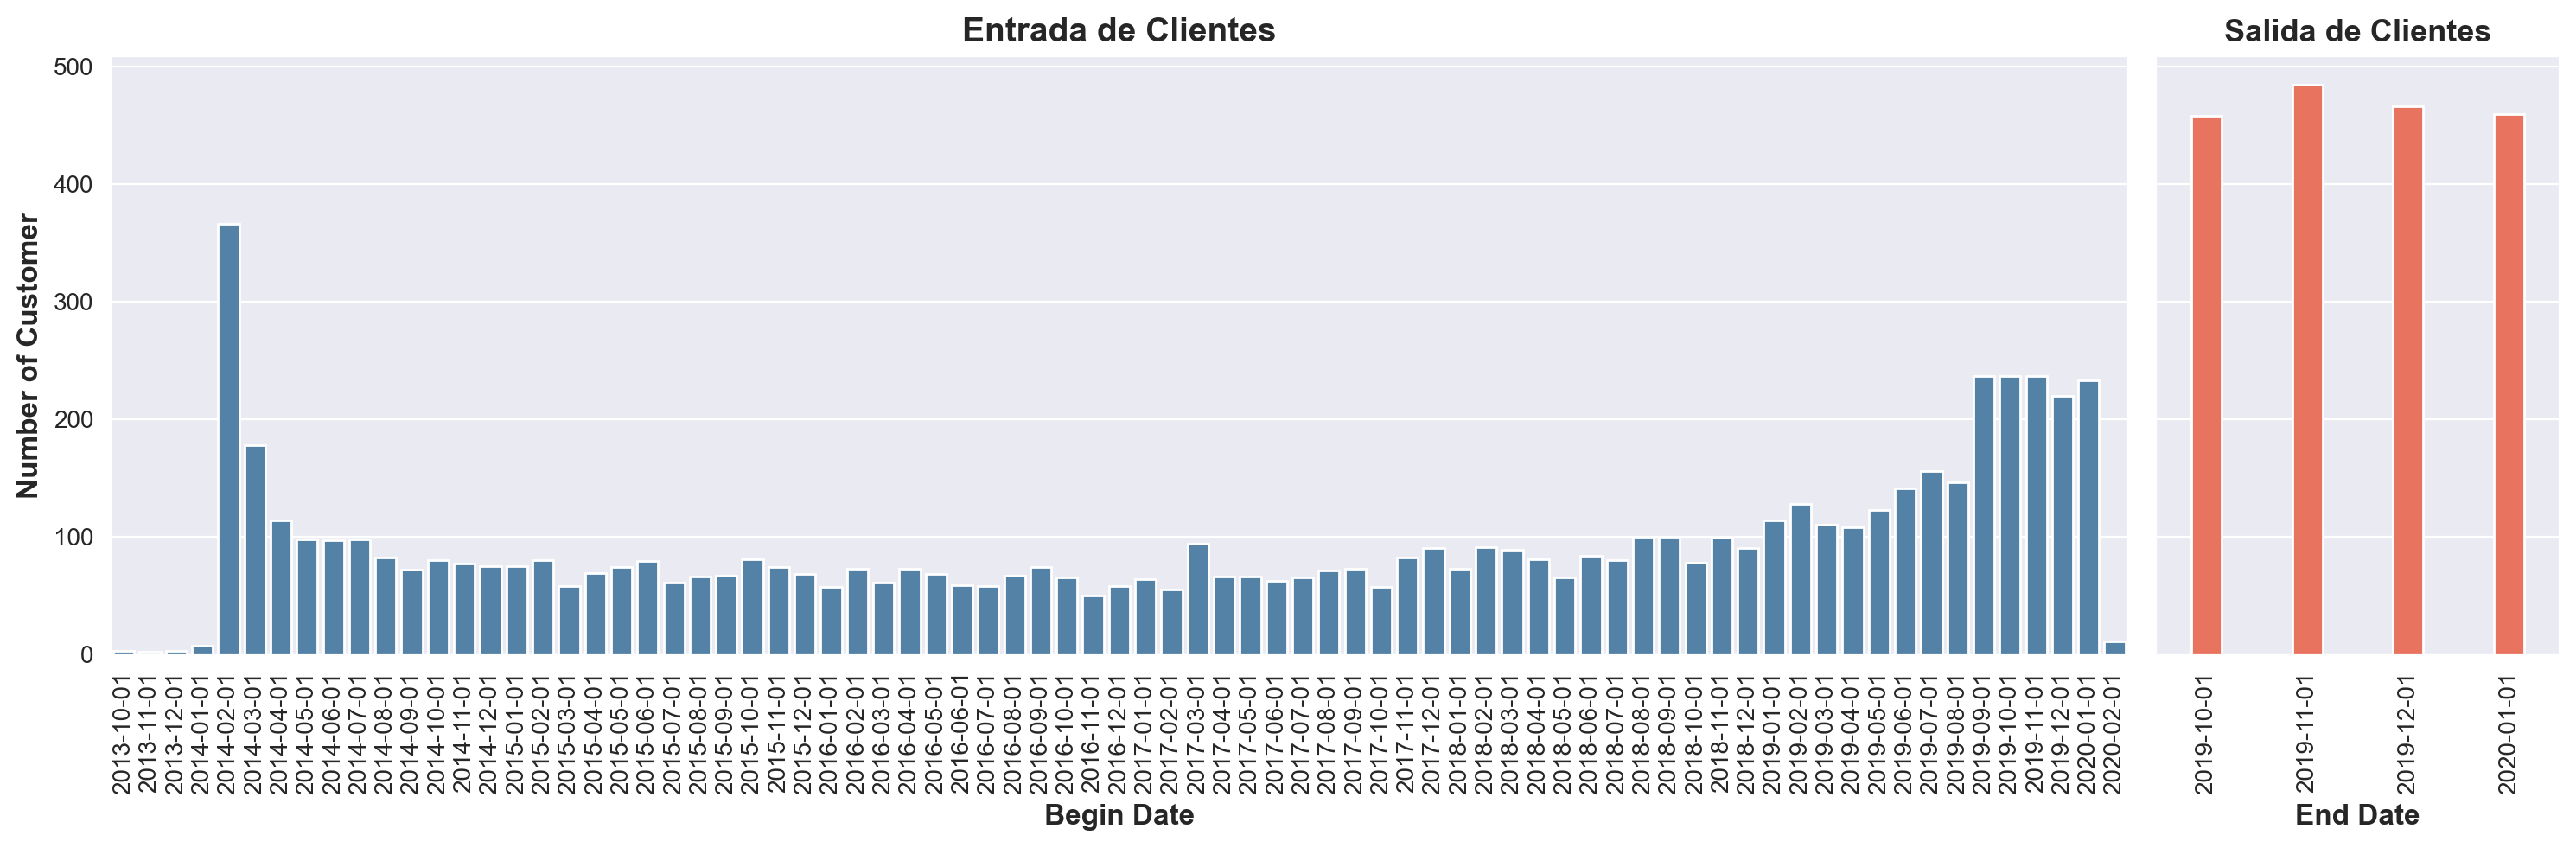

In [134]:
# Graficamos para visualizar las fechas de incorporación y salida de los clientes
sns.set_style('darkgrid')
fig, axs = plt.subplots(1, 2, width_ratios=[5.0, 1.0], sharey=True, figsize=(15, 5))

# Fechas de entrada
df_t = df_all['begin_date'].value_counts().sort_index()
ax = axs[0]
sns.barplot(x=df_t.index, y=df_t.values, color='steelblue', ax=ax)
ax.set_title('Entrada de Clientes', fontsize=14, fontweight='bold')
ax.set_xlabel('Begin Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Customer', fontsize=12, fontweight='bold')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)

# Fechas de salida
df_t = df_all['end_date'].value_counts().sort_index()
ax = axs[1]
sns.barplot(x=df_t.index, y=df_t.values, color='tomato', width=0.3, ax=ax)
ax.set_title('Salida de Clientes', fontsize=13, fontweight='bold')
ax.set_xlabel('End Date', fontsize=12, fontweight='bold')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Los clientes empezaron a unirse a los servicios de la empresa desde el `2013-10-01`. En febrero del 2014, el operador adquirió el mayor número de clientes, alrededor de 360. Desde entonces, la entrada de clientes se mantuvo en aproximadamente 50 a 150 por mes hasta Agosto del 2019. Los nuevos clientes aumentaron a alrededor de 220 desde Septiembre del 2019 hasta la fecha en que se extrajo la información. Sin embargo, los clientes también comenzaron a abandonar desde Octubre del 2019, y la cantidad de clientes que se van es casi el doble de la cantidad de clientes que se unen.

[Volver a los contenidos](#back)

### 6.4 Distribución de Variables Clave por Tipo de Servicio <a id='key_variables'></a>

In [62]:
# Obtenemos la lista de las columnas numéricas
numerical_columns = ['monthly_charges', 'total_charges', 'subscribed_days', 'subscribed_years']

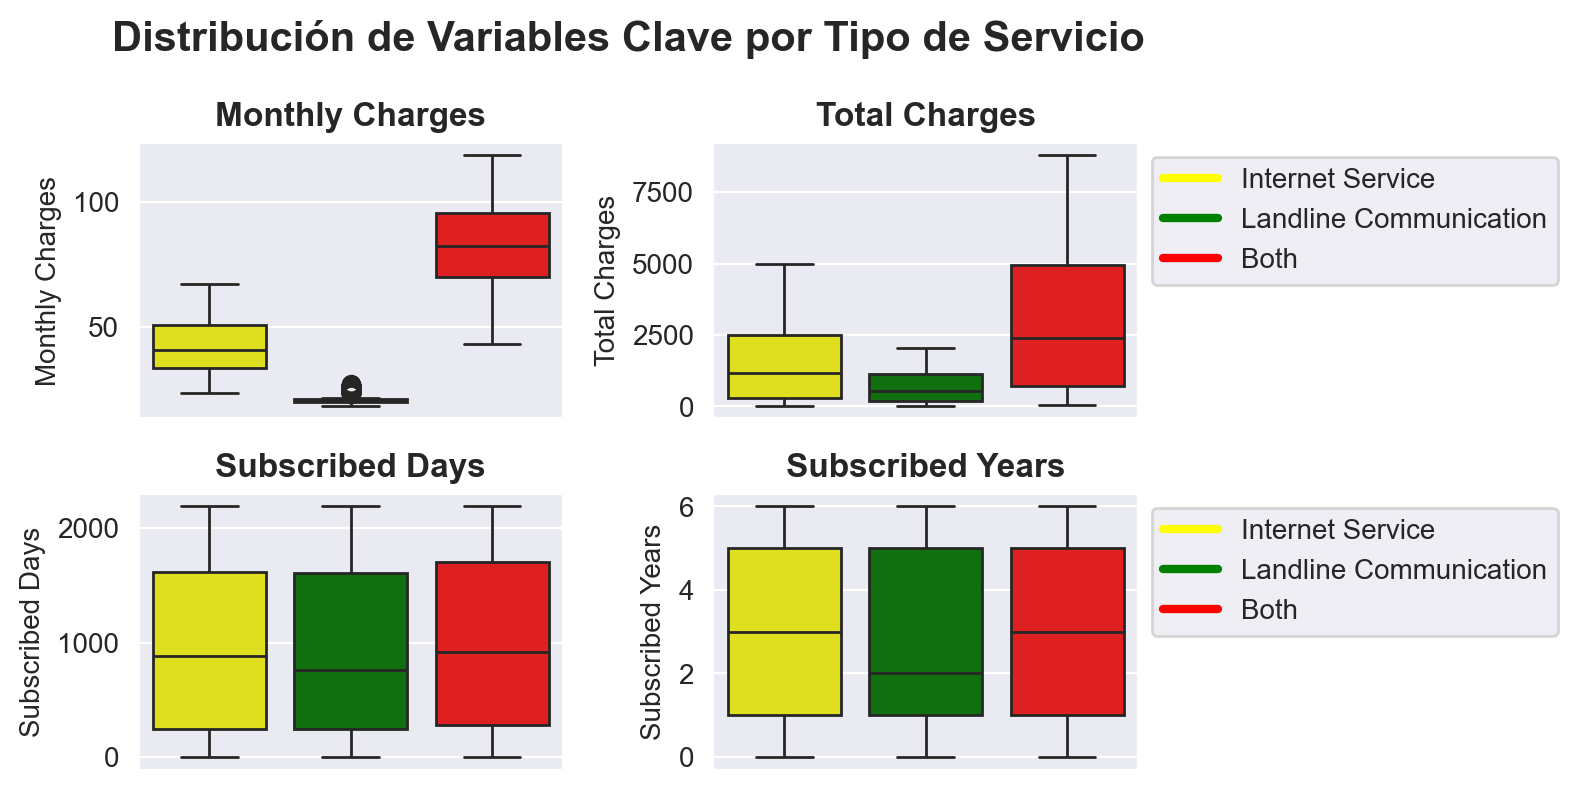

In [133]:
# Graficamos boxplots para mostrar las distribuciones
nrows, ncols = 2, 2
sns.set_style('darkgrid')
palette = ['yellow', 'green', 'red']

fig, axs = plt.subplots(nrows, ncols, figsize=(8, 4))

plt.suptitle('Distribución de Variables Clave por Tipo de Servicio', x=0.4, fontsize=15, fontweight='bold')

for i in range(nrows):
    for j in range(ncols):
        idx = i*ncols + j
        variable = numerical_columns[i*ncols + j]
        variable_name = ' '.join([word.capitalize() for word in variable.split('_')])
        
        ax = axs[i][j]
        sns.boxplot(data=df_all, x='subscribed_service', y=variable, hue='subscribed_service',
                    order=['internet_service', 'landline_communication', 'both'],
                    hue_order=['internet_service', 'landline_communication', 'both'],
                    legend=False, palette=palette, ax=ax)
        ax.set_title(variable_name, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel(variable_name)
        ax.set_xticks([])
        if j == 1:
            legend_labels = ['Internet Service', 'Landline Communication', 'Both']
            legend_handles = [Line2D([0], [0], color=palette[0], lw=3),
                              Line2D([0], [0], color=palette[1], lw=3),
                              Line2D([0], [0], color=palette[2], lw=3)]
            ax.legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Los clientes que se suscriben a ambos servicios pagan sustancialmente más que aquellos que se suscriben a solo uno de los servicios. Los períodos de suscripción para los clientes que usan solo el servicio de comunicación por línea fija son ligeramente más cortos que los de los otros dos grupos.

[Volver a los contenidos](#back)

### 6.5 Tasa de Abandono por Característica Categórica <a id='categorical_features'></a>

**Tasa de abandono por tipo de contrato**

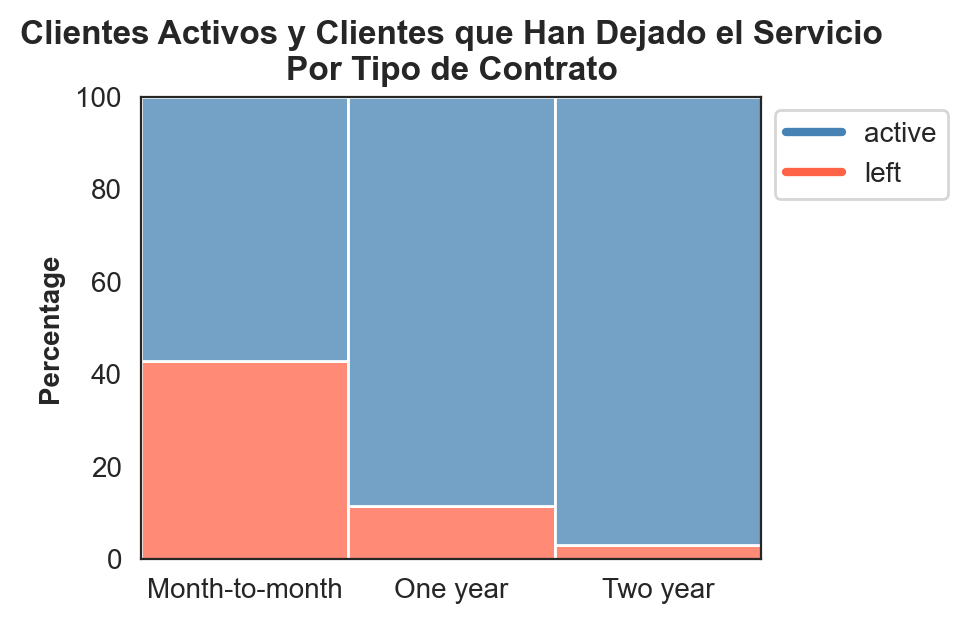

In [132]:
# Dibujamos un gráfico de barras
sns.set_style('white')
plt.figure(figsize=(4, 3))

ax = plt.gca()
plot_filled_bar_chart(data=df_all,
                      x='type',
                      title='Clientes Activos y Clientes que Han Dejado el Servicio\nPor Tipo de Contrato')

plt.show()

La tasa de abandono de los clientes con contratos mensuales es al menos cuatro veces mayor que la de los otros dos grupos. El departamento de marketing podría trabajar en convertir a estos clientes a contratos de un año o dos años.

**Tasa de abandono por característica relevante del servicio**

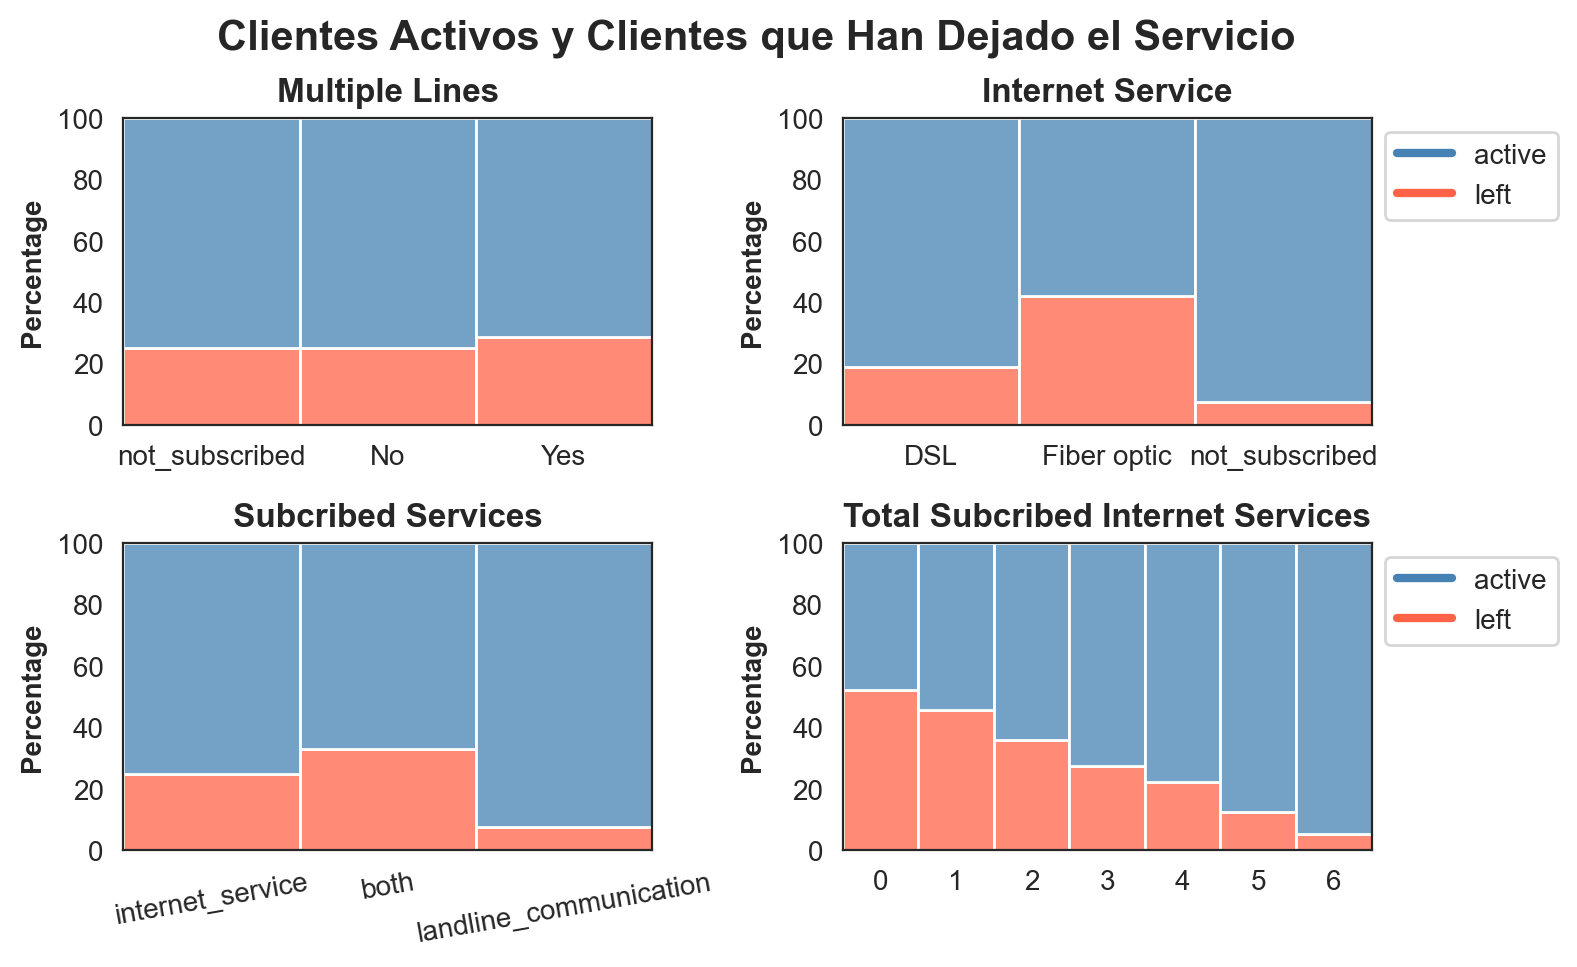

In [131]:
# Dibujamos un gráfico de barras
sns.set_style('white')
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

plt.suptitle('Clientes Activos y Clientes que Han Dejado el Servicio', x=0.48, y=0.96, fontsize=15, fontweight='bold')

ax = axs[0][0]
plot_filled_bar_chart(data=df_all,
                      x='multiple_lines',
                      title='Multiple Lines',
                      legend=False)

ax = axs[0][1]
plot_filled_bar_chart(data=df_all,
                      x='internet_service',
                      title='Internet Service',
                      legend=True)

ax = axs[1][0]
plot_filled_bar_chart(data=df_all,
                      x='subscribed_service',
                      title='Subcribed Services',
                      legend=False)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=10)

ax = axs[1][1]
plot_filled_bar_chart(data=df_all.query('internet_service != "not_subscribed"'),
                      x='total_internet_services',
                      title='Total Subcribed Internet Services',
                      legend=True)
ax.set_xticks(np.arange(0, 7), np.arange(0, 7))
ax.set_xlim(-0.5, 6.5)

plt.tight_layout()
plt.show()

Con o sin el uso de multiple lines, la tasa de abandono es de aproximadamente el 20%. Por otro lado, la tasa de abandono para el servicio de fibra óptica es notablemente más alta que para el servicio DSL. Esto es una señal de alerta considerando la base de usuarios más grande en el servicio de fibra óptica.

Sorprendentemente, los clientes que han suscrito tanto los servicios de internet como de comunicación por línea fija muestran tasas de abandono más altas. Para los clientes con suscripción a internet, cuanto más servicios adicionales de internet utilizan, menos probable es que abandonen.

**Tasa de abandono por servicio adicional de internet**

In [66]:
# Obtenemos la lista de features relevantes del servicio
internet_services = ['online_security', 'online_backup', 'device_protection',
                     'tech_support', 'streaming_tv', 'streaming_movies']

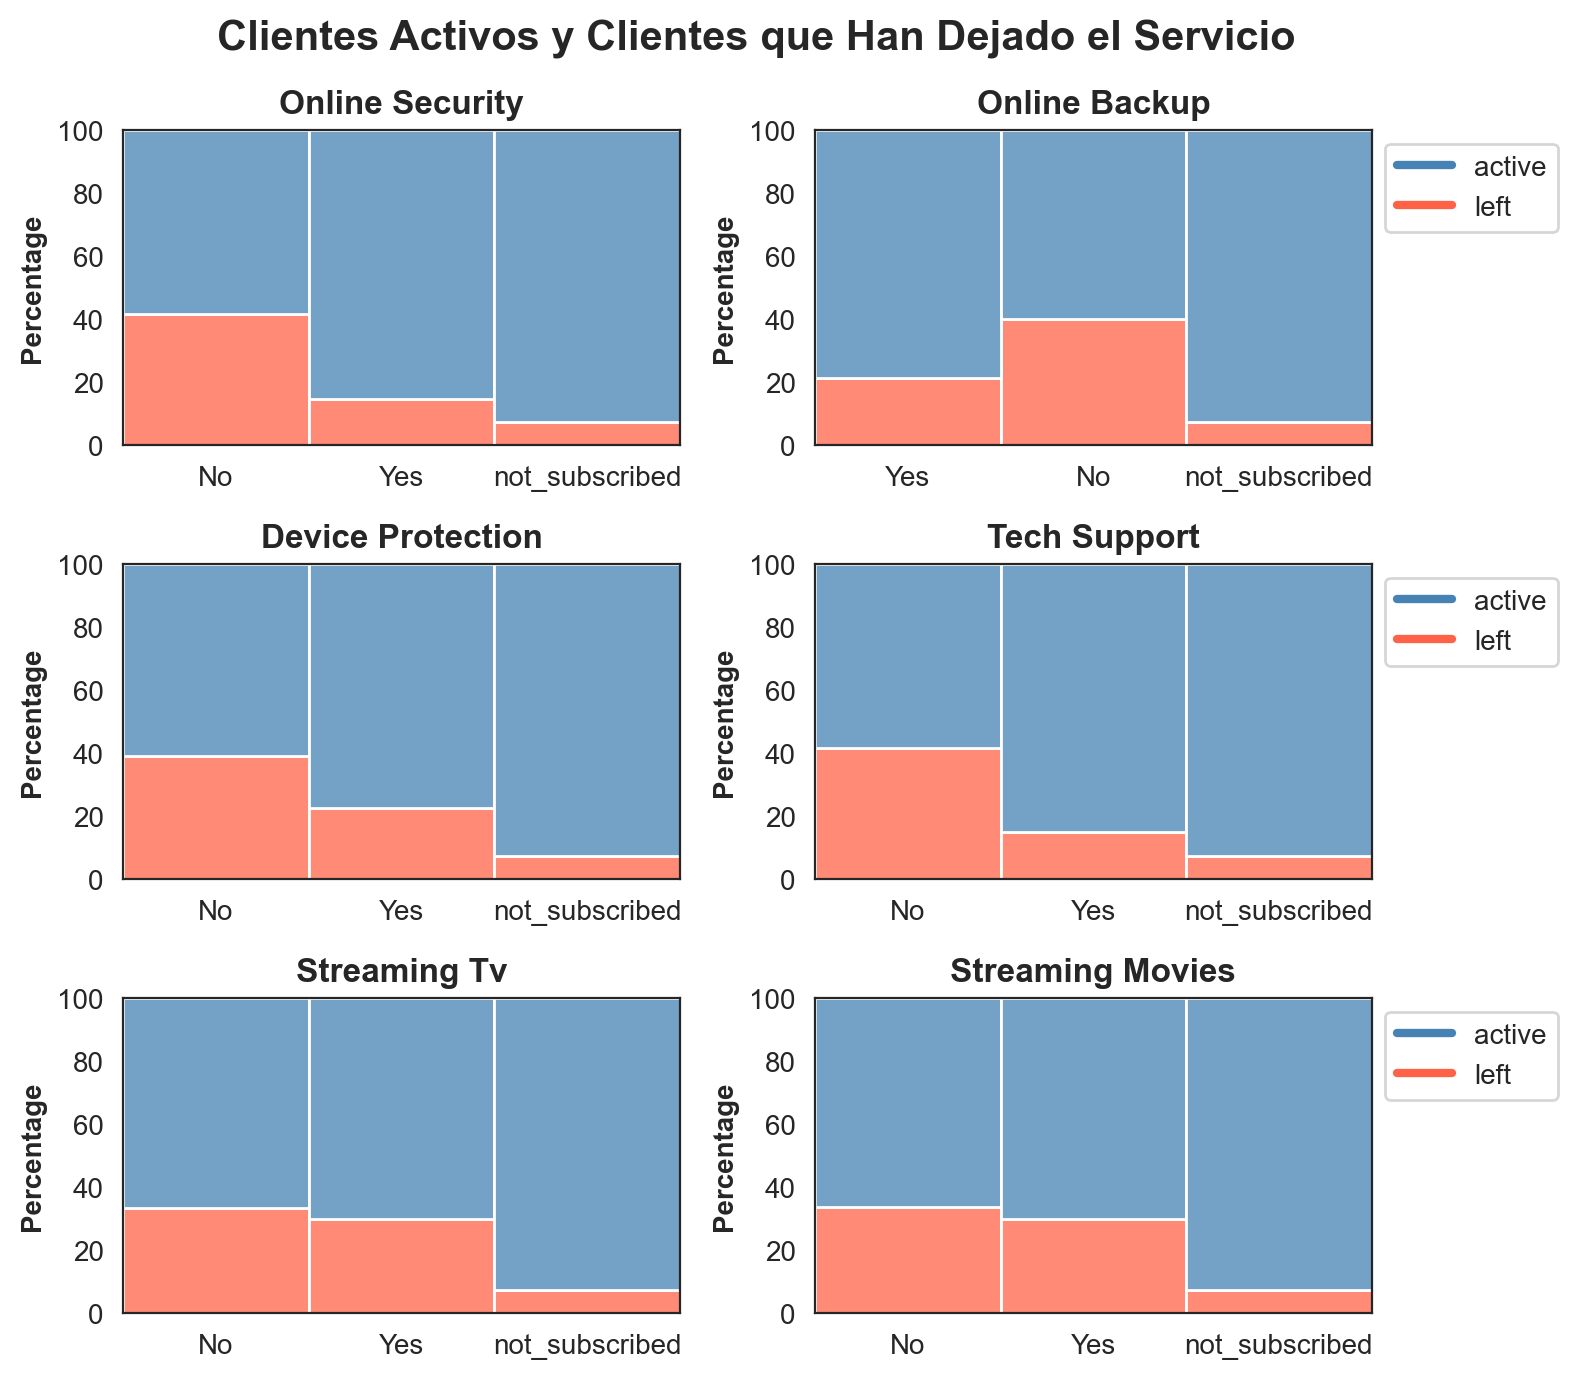

In [130]:
# Grafitamos
nrows, ncols = 3, 2
sns.set_style('white')
fig, axs = plt.subplots(nrows, ncols, figsize=(8, 7))

plt.suptitle('Clientes Activos y Clientes que Han Dejado el Servicio', x=0.48, fontsize=15, fontweight='bold')

for i in range(nrows):
    for j in range(ncols):
        ax = axs[i][j]
        # Obtenemos el nombre de la columna de servicio
        service = internet_services[i*ncols + j]
        title = ' '.join([word.capitalize() for word in service.split('_')])

        # Dibjuamos un gráfico de barras
        if j == 0:            
            plot_filled_bar_chart(data=df_all,
                                  x=service,
                                  title=title,                                  
                                  legend=False)
        if j == 1:            
            plot_filled_bar_chart(data=df_all,
                                  x=service,
                                  title=title,                                  
                                  legend=True)

plt.tight_layout()
plt.show()

Para todos los servicios adicionales de internet, cada suscripción adicional reduce la tasa de abandono del cliente. Sin embargo, la diferencia no es significativa para los servicios de `streaming_tv` y `streaming_movies`.

**Tasa de abandono según el comportamiento de pago relevante**

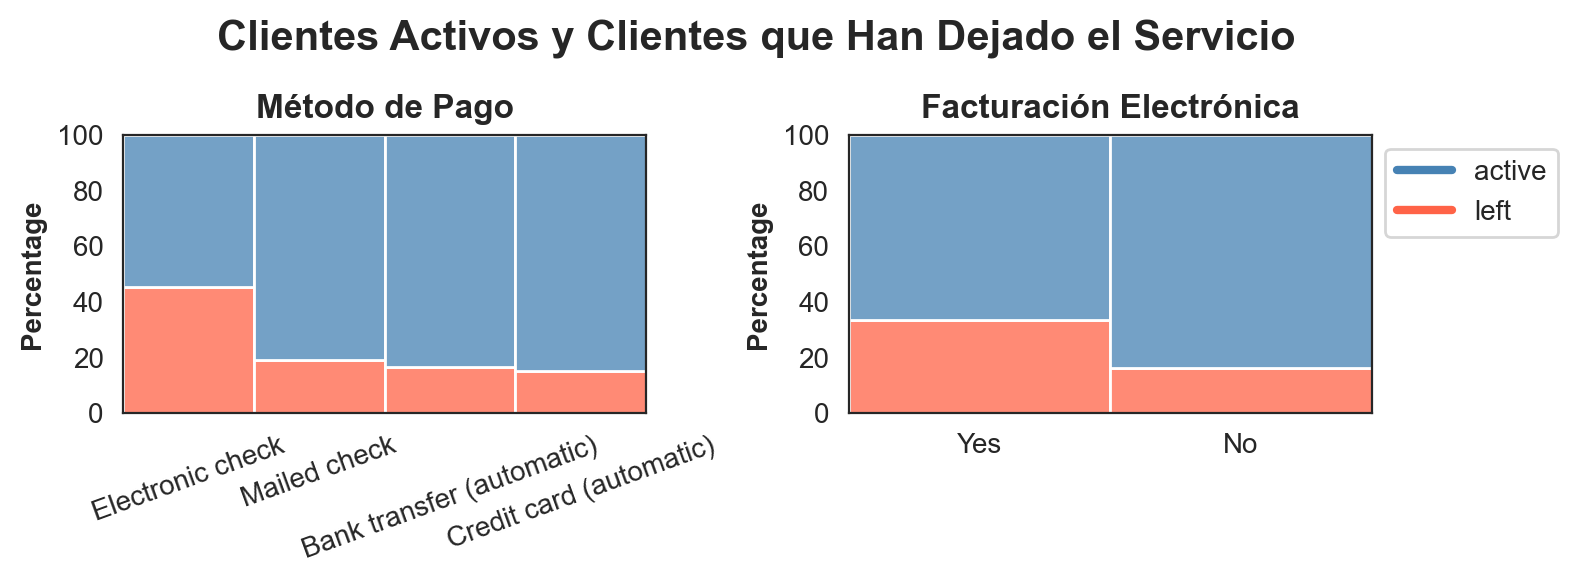

In [129]:
# Dibujamos gráficos de barras
sns.set_style('white')
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

plt.suptitle('Clientes Activos y Clientes que Han Dejado el Servicio', x=0.48, y=0.96, fontsize=15, fontweight='bold')

ax = axs[0]
plot_filled_bar_chart(data=df_all,
                      x='payment_method',
                      title='Método de Pago',
                      legend=False)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=20)

ax = axs[1]
plot_filled_bar_chart(data=df_all,
                      x='paperless_billing',
                      title='Facturación Electrónica',
                      legend=True)

plt.tight_layout()
plt.show()

La probabilidad de abandonar el operador se duplica para aquellos que utilizan cheque electrónico y facturación sin papel para realizar el pago.

**Tasa de cancelación por característica personal**

In [69]:
# Obtenemos la lista de características personales
personal_columns = ['gender', 'senior_citizen', 'partner', 'dependents']

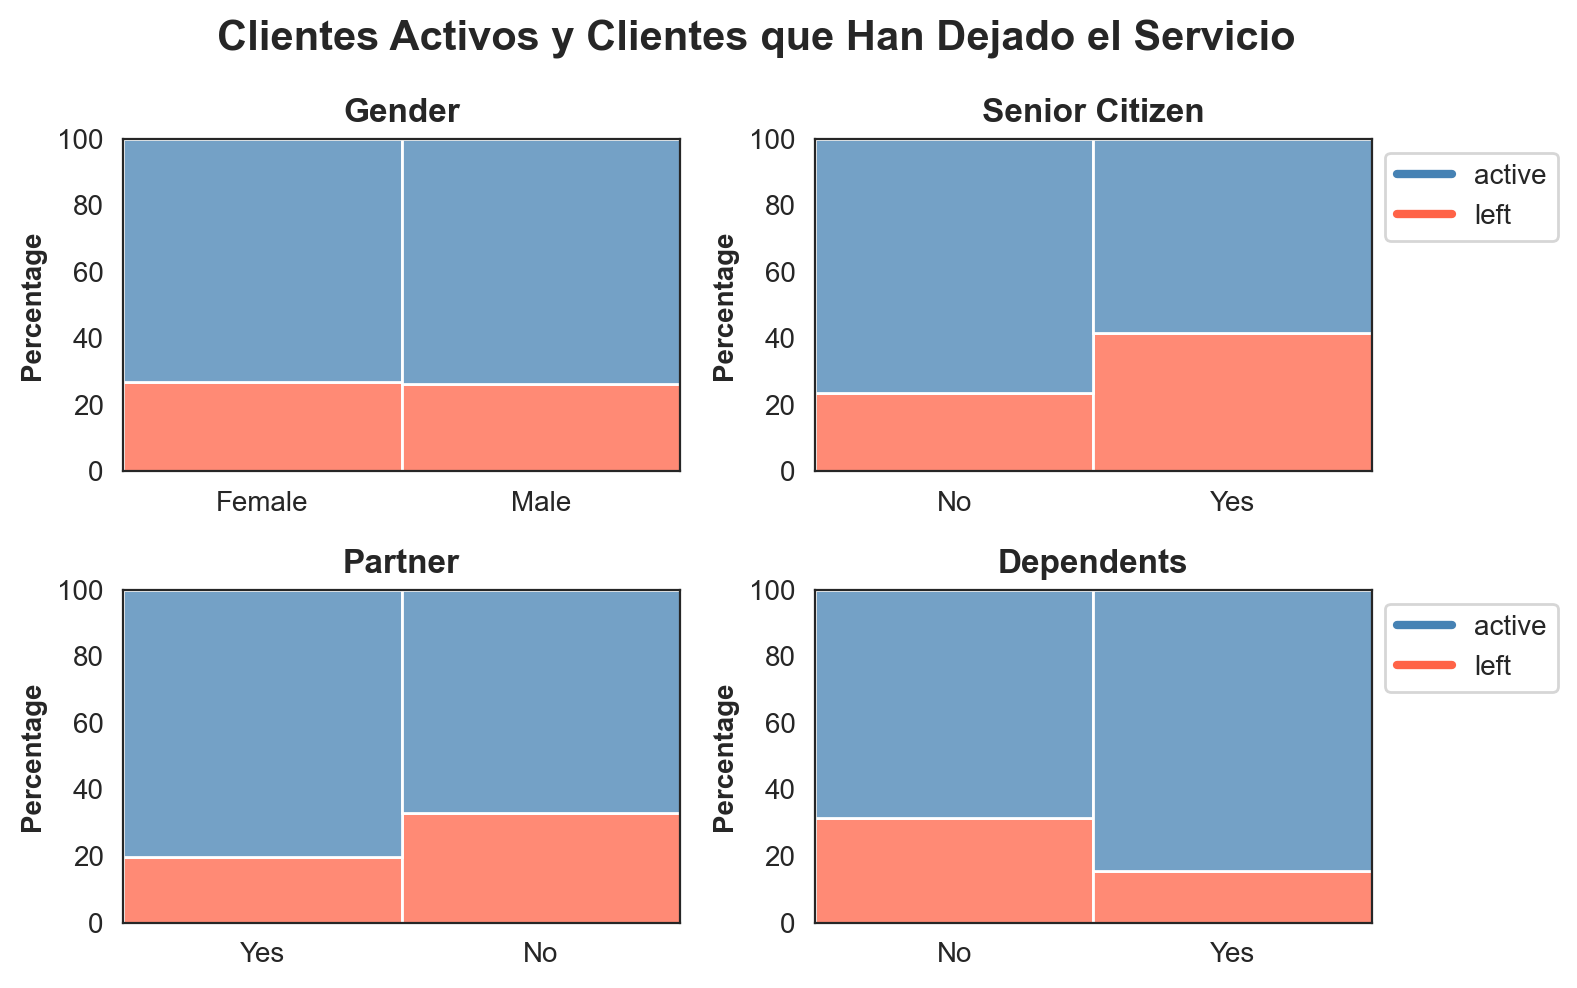

In [127]:
# Dibujamos gráficos
nrows, ncols = 2, 2
sns.set_style('white')
fig, axs = plt.subplots(nrows, ncols, figsize=(8, 5))

plt.suptitle('Clientes Activos y Clientes que Han Dejado el Servicio', x=0.48, fontsize=15, fontweight='bold')

for i in range(nrows):
    for j in range(ncols):
        ax = axs[i][j]
        # Obtenemos el nombre de la columna de servicios
        personal = personal_columns[i*ncols + j]
        title = ' '.join([word.capitalize() for word in personal.split('_')])

        # Dibujamos un gráfico de barras
        if j == 0:            
            plot_filled_bar_chart(data=df_all,
                                  x=personal,
                                  title=title,
                                  legend=False)
        if j == 1:
            service = internet_services[i*ncols + j]
            plot_filled_bar_chart(data=df_all,
                                  x=personal,
                                  title=title,
                                  legend=True)

axs[0][1].set_xticks(np.arange(0, 2), ['No', 'Yes'])

plt.tight_layout()
plt.show()

A partir de los gráficos, sabemos que:
- El género no tiene efecto en la tasa de cancelación.
- Los ciudadanos mayores tienen más probabilidades de cancelar. Podríamos investigar si la tasa de cancelación está relacionada con la edad si tuviéramos los datos de edad.
- La tasa de cancelación es más baja entre los clientes con pareja o dependientes.

[Volver a los contenidos](#back)

### 6.6 Coeficiente de Correlación entre Características Numéricas y Target <a id='correlation'></a>

In [71]:
# Veamos la lista de características numéricas
numerical_features = ['monthly_charges', 'total_charges', 'subscribed_days',
                      'subscribed_years', 'total_internet_services']

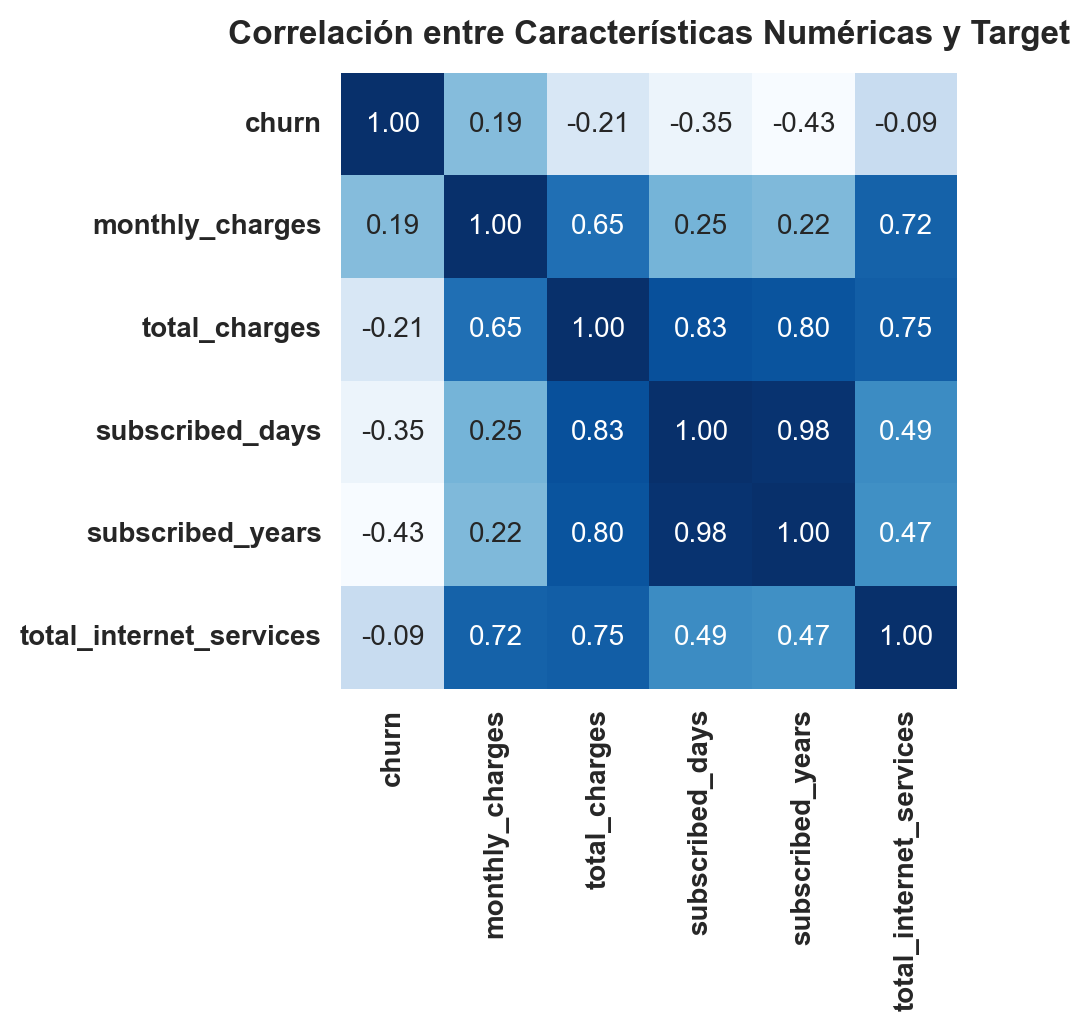

In [126]:
# Grafiquemos el mapa de calor de los coeficientes de correlación
sns.set_style('white')
plt.figure(figsize=(4, 4))

corr_data = df_all[['churn'] + numerical_features].corr()

sns.heatmap(corr_data, annot=True, fmt='.2f',
            cmap='Blues', square=True, cbar=False)

plt.title('Correlación entre Características Numéricas y Target',
          fontsize=12, fontweight='bold', y=1.02)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

De los coeficientes de correlación, se puede observar que:
- Los `subscribed_days` y `subscribed_years` tienen una relación moderada e indirecta con el target `churn`.
- Los `monthly_charges` y `total_charges` tienen una relación débil con el target.
- El `total_internet_services` no tiene una relación lineal con el target.

[Volver a los contenidos](#back)

### 6.7 Distribución de Características Numéricas por Target Class <a id='numerical_features'></a>

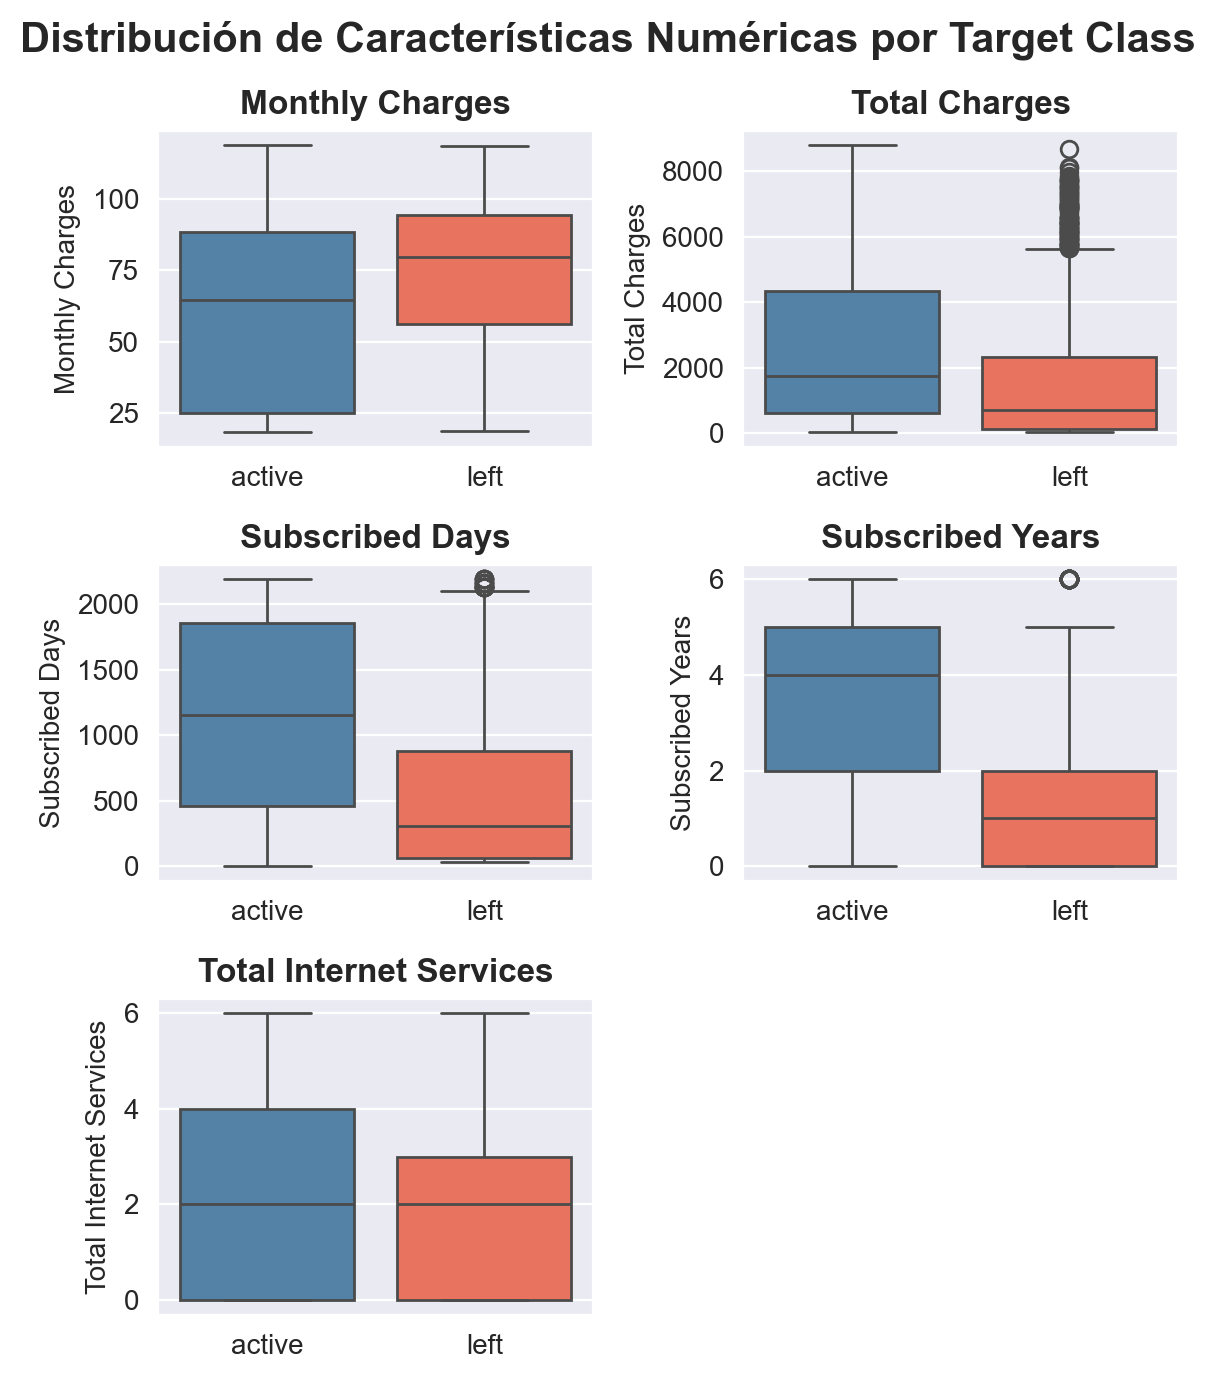

In [125]:
# Graficamos un boxplot para mostrar las distribuciones
nrows, ncols = 3, 2
sns.set_style('darkgrid')
palette=['steelblue', 'tomato']

fig, axs = plt.subplots(nrows, ncols, figsize=(6, 7))

plt.suptitle('Distribución de Características Numéricas por Target Class', fontsize=15, fontweight='bold')

for i in range(nrows):
    for j in range(ncols):
        idx = i*ncols + j
        ax = axs[i][j]
        
        if idx < len(numerical_features):
            feature = numerical_features[idx]
            feature_name = ' '.join([word.capitalize() for word in feature.split('_')])            
            
            sns.boxplot(data=df_all, x='churn', y=feature, hue='churn', legend=False,
                        palette=palette, ax=ax)
            ax.set_title(feature_name, fontweight='bold')
            ax.set_xlabel('')
            ax.set_ylabel(feature_name)
            ax.set_xticks([0, 1], ['active', 'left'])
        else:
            sns.set_style('white')
            ax.axis(False)
            
plt.tight_layout()
plt.show()

Todas las características numéricas son buenos predictores excepto `total_internet_services`.

[Volver a los contenidos](#back)

### 6.8 Distribución de Target Classes <a id='target_classes'></a>

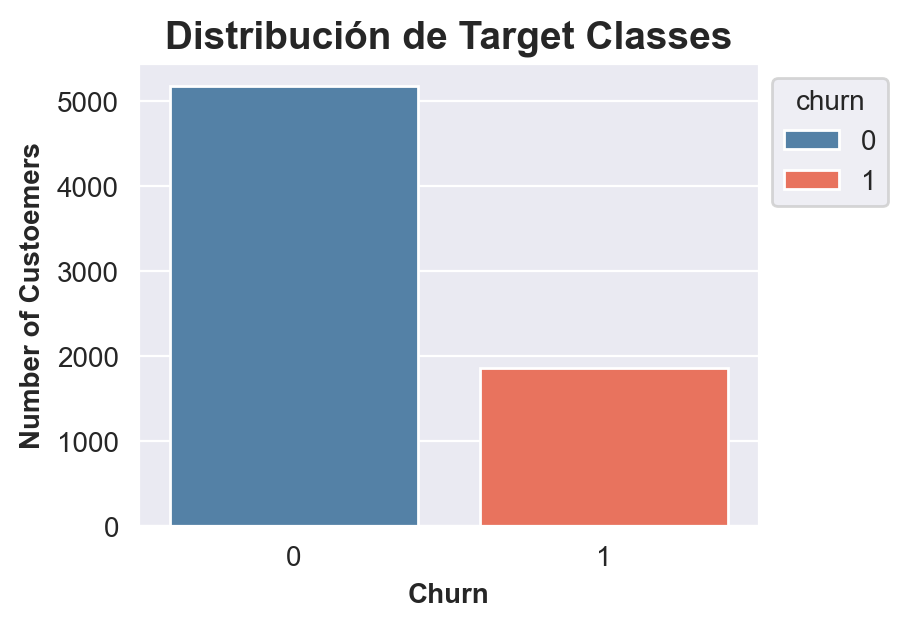

churn
0    0.7346
1    0.2654
Name: proportion, dtype: float64

In [123]:
# Dibujamos un gráfico de barras para visualizar la distribución de las clases de target
sns.set_style('darkgrid')
plt.figure(figsize=(4, 3))

sns.countplot(data=df_all, x='churn', hue='churn', palette=['steelblue', 'tomato'])
plt.legend(title='churn', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Distribución de Target Classes', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontweight='bold')
plt.ylabel('Number of Custoemers', fontweight='bold')

plt.show()

# Calculamos el porcentaje de cada clase
display(df_all['churn'].value_counts(normalize=True).round(4))

Las clases target están muy desbalanceadas, con un 73.46% de clientes activos y un 26.54% de clientes que se han ido. Como resultado, el Dataset se ajustará antes de entrenar el modelo.

[Volver a los contenidos](#back)

### 6.9 Conclusión <a id='eda_conclusion'></a>

Después de analizar las características y comportamientos de los clientes, los resultados se resumen y concluyen de la siguiente manera:

1. Los clientes que han abandonado tienden a tener un pago mensual más alto. Los clientes con un pago mensual de `70-110` tienen una tasa de abandono más alta del `36.79%` en comparación con los otros clientes.
2. La mayoría de los clientes (`68.65%`) se suscribieron tanto a los servicios de comunicación por línea fija como a los de internet.
3. Aunque hubo un gran aumento en el número de clientes adquiridos desde Septiembre del 2019, el número de clientes que se dieron de baja fue el doble que el de los nuevos clientes.
4. Entre los usuarios del servicio de internet, la fibra óptica es la opción principal, pero la tasa de cancelación de este servicio es significativamente más alta en comparación con los usuarios de DSL.
5. Los clientes que solo utilizan el servicio de comunicación por línea fija tienen una duración de suscripción ligeramente más corta.
6. La tasa de cancelación de los clientes con contratos mensuales es al menos cuatro veces mayor que la tasa de cancelación de los otros dos grupos.
7. Mientras que la tasa de cancelación es más alta entre los usuarios que se suscribieron a ambos servicios, los clientes tienen menos probabilidades de dejar el servicio cuando se suscriben a más servicios adicionales de internet.
8. La tasa de cancelación entre los clientes que usan cheques electrónicos y facturación sin papel para realizar el pago es el doble que la tasa de cancelación entre los clientes que utilizan otros métodos de pago.
9. Las personas mayores tienen más probabilidades de dejar al operador. Por otro lado, los clientes con pareja o dependientes tienen menos probabilidades de cancelar los servicios.
10. Cuanto más larga sea la duración de la suscripción, menor será la probabilidad de abandonar al operador.
11. Las clases de target están desequilibradas, con un `73.46%` de clientes activos y un `26.54%` de clientes que han abandonado.

[Volver a los contenidos](#back)

## 7. Modelamiento <a id='modeling'></a>

Las siguientes funciones automatizarán las tareas en esta etapa.

In [75]:
def optimise_model(model, objective, X_train, y_train, X_val, y_val, n_trials, model_name):    
    # Configuramos el nivel de Optuna para qu solo muestre advertencias
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    
    # Creaamos el estudio Optuna
    study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=42),
                                direction='maximize',
                                study_name=f'{model_name}_study')    

    # Optimizamos el modelo y mostramos el progreso
    with tqdm(total=n_trials, desc=f'Optimising {model_name}... ') as pbar:
        def callback(study, trial):
            pbar.update(1)    
        study.optimize(objective, n_trials=n_trials, callbacks=[callback])

    # Imprimimos el mejor hiperparámetro encontrado
    print('Best hyperparameters:')
    display(study.best_params)    
    print()
    
    # Recreamos el mejor modelo
    best_model = model(**study.best_params) 

    # Entrenamos el modelo y registramos el tiempo de entrenamiento          
    train_start = time.time()
    best_model.fit(X_train, y_train)
    train_end = time.time()
    train_time = round((train_end - train_start) * 1000, 2)

    return best_model, train_time

In [76]:
def evaluate_model(model, X_train, y_train, X_test, y_test, test_set=False):
    # Creamos un diccionario para almacenar las estadísticas de evaluación
    eval_stats = {}

    # Graficamos la ROC curve y la Matriz de confusión
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    for data_type, X, y in (('train', X_train, y_train), ('test', X_test, y_test)):     
        # Creamos un diccionario para almacenar las estadísticas de entrenamiento y prueba
        eval_stats[data_type] = {}

        # Obtenemos la probabilidad de predicción y las predicciones
        # Calculamos el tiempo de predicción
        pred_proba = model.predict_proba(X)[:, 1]
        pred_start = time.time()
        y_pred = model.predict(X)
        pred_end = time.time()

        # Almacenamos el tiempo de predicción en el conjunto de prueba
        if data_type == 'test':
            pred_time = round((pred_end - pred_start) * 1000, 2)

        # Obtenemos los datos necesarios para trazar la curva ROC
        fpr, tpr, roc_thresholds = roc_curve(y, pred_proba)
        roc_auc = roc_auc_score(y, pred_proba)        
                
        # Asignamos colores para los conjuntos de entrenamiento y prueba en el gráfico
        if data_type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Graficamos la ROC curve
        ax = axs[0]
        if data_type == 'train':
            ax.plot(fpr, tpr, color=color, label=f'train, ROC AUC={roc_auc:.4f}')
        else:
            if not test_set:
                ax.plot(fpr, tpr, color=color, label=f'val, ROC AUC={roc_auc:.4f}')
            else:
                ax.plot(fpr, tpr, color=color, label=f'test, ROC AUC={roc_auc:.4f}')
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_title('ROC Curve', fontsize=12, fontweight='bold')
        ax.set_xlabel('FPR', fontweight='bold')
        ax.set_ylabel('TPR', fontweight='bold')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.legend(loc='lower center', prop={'size': 8, 'weight': 'bold'})
        
        # Marcamos algunos puntos en la curva con los thresholds seleccionados
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx],
                    color=marker_color, marker='X', markersize=7)
            
        # Graficamos la matriz de confusión en el conjunto de prueba
        if data_type == 'test':
            ax = axs[1]
            sns.heatmap(confusion_matrix(y, y_pred), cmap='Blues', annot=True, square=True,
                        fmt='.0f', annot_kws={'fontsize': 12, 'fontweight': 'bold'}, cbar=False, ax=ax)
            ax.set_title('Confusion Matrix', fontsize=12, fontweight='bold')
            ax.set_xlabel('Predicted', fontweight='bold')
            ax.set_ylabel('Actual', fontweight='bold')
            ax.set_xticks([0.5, 1.5], ['Active', 'Left'])
            ax.set_yticks([0.5, 1.5], ['Active', 'Left'])
        
        # Almacena la puntuación ROC AUC y la precisión (accuracy_score)
        eval_stats[data_type]['ROC AUC'] = roc_auc
        eval_stats[data_type]['Accuracy'] = accuracy_score(y, y_pred)

    plt.tight_layout()
    plt.show()
    
    # Obtenemos el resultado de la evaluación para mostrarlo.
    eval_stats_df = pd.DataFrame(eval_stats)
    eval_stats_df = eval_stats_df.round(4).reindex(index=('ROC AUC', 'Accuracy'))    

    # Devuelve el resultado de la evaluación según sea necesario.
    if not test_set:
        result = {
            'train_roc_auc': eval_stats_df.loc['ROC AUC', 'train'],
            'val_roc_auc': eval_stats_df.loc['ROC AUC', 'test'],
            'train_acc': eval_stats_df.loc['Accuracy', 'train'],
            'val_acc': eval_stats_df.loc['Accuracy', 'test'],
            'prediction_time (ms)': pred_time
        }

        # Ajustamos los nombres de las columnas y mostramos el resultado de la evaluación
        eval_stats_df.columns = ['train', 'validation']
        display(eval_stats_df)
        
        return result        
    else:
        # Mostramos el resultado de la evaluación
        display(eval_stats_df)

In [77]:
def save_model(model, model_path, model_name):
    # Eliminamos el modelo si existe
    if os.path.isfile(model_path):
        os.remove(model_path)

    # Guardamos el modelo
    try:
        pickle.dump(model, open(model_path, 'wb'))        
    except Exception as e:
        print('Failed to save the model.')
        print(f'Unexpected Error: {e}')
    else:
        print(f'The {model_name} model has been successfully saved.')

---

**Obtengamos las características y target**

Para predecir el target `churn`, se entrenarán los siguientes seis modelos:

- Baseline model: Modelo Constante
- Linear model: Logistic Regression
- Tree-based model: Decision Tree
- Gradient boosting ensemble: LightGBM, CatBoost, XGBoost

Antes de entrenar los modelos, el primer paso es separar el conjunto de datos en las características y `target`. Además, se eliminarán las siguientes características innecesarias.

- `customer_id`: Esta característica no proporciona información para predecir el `target`.
- `begin_date` y `end_date`: La información necesaria ha sido extraída, ya que se han creado dos características adicionales, `subscribed_days` y `subscribed_years`, a partir de estas dos características.

In [78]:
# Obtenemos las características y el target
X = df_all.drop(columns=['customer_id', 'begin_date', 'end_date', 'churn'])
y = df_all['churn']

# Chequeamos las formas de X & y
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (7043, 21)
Shape of y: (7043,)


**One-Hot Encoding**

Aunque algunos modelos (por ejemplo, LightGBM y CatBoost) pueden manejar características categóricas internamente, aún realizaremos codificación one-hot en las características categóricas para asegurar que todos los modelos puedan ser entrenados correctamente.

In [79]:
# Codificamos las características categóricas usando One-hot.
X_ohe = pd.get_dummies(X, drop_first=True, dtype=int)

# Chequeamos la forma de X_ohe
print('Shape of X after one-hot encoding:', X_ohe.shape)

Shape of X after one-hot encoding: (7043, 33)


**Dividimos el conjunto de datos en conjuntos de entrenamiento, validación y prueba**

Dado que no tenemos muchos datos, utilizaremos el 80% del conjunto de datos para entrenamiento y dividiremos el 20% restante equitativamente entre validación y prueba.

In [80]:
# Dividimos el Dataset en train:val:test = 80:10:10
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Revisamos las formas
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_val', X_val.shape)
print('Shape of y_val', y_val.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (5634, 33)
Shape of y_train (5634,)
Shape of X_val (704, 33)
Shape of y_val (704,)
Shape of X_test (705, 33)
Shape of y_test (705,)


**Escalado de características**

Para las características numéricas, se llevará a cabo el escalado de características mediante estandarización. Aunque el escalado de características no afecta el rendimiento predictivo de los seis modelos en este proyecto, los modelos de gradiente de refuerzo (LightGBM, CatBoost y XGBoost) pueden converger mejor y más rápido después del escalado de características, ya que el algoritmo de optimización de estos modelos se basa en el descenso de gradiente.

In [81]:
# Obtenemos la lista de características numéricas
numerical_features = ['monthly_charges', 'total_charges', 'subscribed_days', 'subscribed_years', 'total_internet_services']

In [82]:
# Realizamos el escalado de características
sc = StandardScaler()
X_train[numerical_features] = sc.fit_transform(X_train[numerical_features])
X_val[numerical_features] = sc.transform(X_val[numerical_features])
X_test[numerical_features] = sc.transform(X_test[numerical_features])

In [83]:
# Realizamos una revisión después del escalado de características.
display(X_train.head(3))
display(X_val.head(3))
display(X_test.head(3))

,monthly_charges,total_charges,senior_citizen,subscribed_days,subscribed_years,total_internet_services,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),...,tech_support_Yes,tech_support_not_subscribed,streaming_tv_Yes,streaming_tv_not_subscribed,streaming_movies_Yes,streaming_movies_not_subscribed,multiple_lines_Yes,multiple_lines_not_subscribed,subscribed_service_internet_service,subscribed_service_landline_communication
2142,-0.000474,-0.407052,0,-0.464150,-0.440266,0.515663,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1623,1.074754,1.266081,0,0.886385,0.995461,0.515663,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
6074,-1.376499,-1.009904,0,-1.286039,-1.397417,-1.103761,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


,monthly_charges,total_charges,senior_citizen,subscribed_days,subscribed_years,total_internet_services,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),...,tech_support_Yes,tech_support_not_subscribed,streaming_tv_Yes,streaming_tv_not_subscribed,streaming_movies_Yes,streaming_movies_not_subscribed,multiple_lines_Yes,multiple_lines_not_subscribed,subscribed_service_internet_service,subscribed_service_landline_communication
457,0.529662,0.051562,0,-0.096922,0.038310,1.595279,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
2284,-0.297948,-0.926794,0,-1.202639,-0.918841,-0.024145,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
640,-1.311686,-0.300343,0,1.459421,1.474037,-1.103761,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1


,monthly_charges,total_charges,senior_citizen,subscribed_days,subscribed_years,total_internet_services,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),...,tech_support_Yes,tech_support_not_subscribed,streaming_tv_Yes,streaming_tv_not_subscribed,streaming_movies_Yes,streaming_movies_not_subscribed,multiple_lines_Yes,multiple_lines_not_subscribed,subscribed_service_internet_service,subscribed_service_landline_communication
381,-0.472444,-0.998006,0,-1.286039,-1.397417,-0.563953,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
681,0.297000,1.031274,0,1.171558,0.995461,1.055471,0,1,1,0,...,1,0,1,0,1,0,0,0,0,0
4127,-1.331629,-0.386340,0,0.968440,0.995461,-1.103761,0,1,1,0,...,0,1,0,1,0,1,1,0,0,1


El proceso de escalado de características se ha realizado correctamente.

**Sobre-muestreo de la clase minoritaria del conjunto de entrenamiento.**


En la etapa anterior, hemos descubierto que el conjunto de datos tiene clases objetivo desequilibradas. Para abordar este problema, realizaremos un sobre-muestreo de la clase minoritaria en el conjunto de entrenamiento.

In [84]:
# Verificamos el conteo de cada clase antes del sobre-muestreo
y_train.value_counts()

churn
0    4138
1    1496
Name: count, dtype: int64

In [85]:
# Separamos el conjunto de entrenamiento en la clase mayoritaria y la clase minoritaria.
X_major = X_train[y_train == 0]
y_major = y_train[y_train == 0]

X_minor = X_train[y_train == 1]
y_minor = y_train[y_train == 1]

# Obtengamos el tamaño necesario para sobre-muestrear la clase minoritaria.
upsize = len(y_major)

# Sobre-muestreo de la clase minoritaria
X_minor_up = X_minor.sample(upsize, replace=True, random_state=42)
y_minor_up = y_minor.sample(upsize, replace=True, random_state=42)

# Combinamos las clases mayoritaria y minoritaria después del sobre-muestreo y mezcla
X_train_up = pd.concat([X_major, X_minor_up])
y_train_up = pd.concat([y_major, y_minor_up])

X_train_up, y_train_up = shuffle(X_train_up, y_train_up, random_state=42)

In [86]:
# Chequeamos después del sobre-muestreo
display(X_train_up.head(3))
display(y_train_up.head(3))

,monthly_charges,total_charges,senior_citizen,subscribed_days,subscribed_years,total_internet_services,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),...,tech_support_Yes,tech_support_not_subscribed,streaming_tv_Yes,streaming_tv_not_subscribed,streaming_movies_Yes,streaming_movies_not_subscribed,multiple_lines_Yes,multiple_lines_not_subscribed,subscribed_service_internet_service,subscribed_service_landline_communication
6380,1.312401,1.903074,1,1.335667,1.474037,1.055471,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
894,0.542957,1.187192,0,1.253612,1.474037,-0.563953,1,0,1,1,...,1,0,0,0,0,0,1,0,0,0
1029,0.778942,-0.900418,1,-1.202639,-1.397417,0.515663,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


6380    0
894     0
1029    1
Name: churn, dtype: int64

In [87]:
# Verificamos el conteo de cada clase después del sobre-muestreo
y_train_up.value_counts()

churn
0    4138
1    4138
Name: count, dtype: int64

[Volver a los contenidos](#back)

### 7.1 Entrenamiento del Modelo <a id='train_model'></a>

Para cada modelo, se ajustarán varios hiperparámetros. Se utilizará la biblioteca Optuna para buscar el mejor modelo posible con un número limitado de búsquedas. En Optuna, se puede utilizar el algoritmo Tree-structured Parzen Estimator (TPE) para muestrear hiperparámetros durante el proceso de optimización. El algoritmo TPE es un método de optimización bayesiana que utiliza una distribución de probabilidad para guiar la búsqueda de hiperparámetros óptimos.

In [88]:
# Creamos diccionarios para almacenar información diversa para su uso posterior.
best_model = {}
train_time = {}
result = {}

# Creamos una carpeta para almacenar el modelo.
model_folder = 'models'
os.makedirs(model_folder, exist_ok=True)

#### 7.1.1 Constant Model <a id='constant'></a>

Se utilizará el Constant Model que siempre predice la clase mayoritaria (`0` en el conjunto de datos antes de la sobre-muestreo) como modelo de referencia. No se ajustarán hiperparámetros.

In [89]:
# Configuramos el proceso de modelado
model_name = 'Constant'
opt_model = DummyClassifier

# Creamos el objetivo de Optuna
def objective(trial):
    # Definimos el espacio de búsqueda
    hyperparameters = {}
    
    # Entrenamos y evaluamos el modelo
    model = opt_model(**hyperparameters)
    model.fit(X_train_up, y_train_up)
    val_roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    return val_roc_auc

# Número de busquedas para encontrar el mejor modelo
n_trials = 1

In [90]:
%%time
# Buscamos el mejor modelo posible
best_model[model_name], train_time[model_name] = optimise_model(
    opt_model, objective, X_train, y_train, X_val, y_val, n_trials, model_name
)

Optimising Constant... :   0%|          | 0/1 [00:00<?, ?it/s]

Best hyperparameters:


{}


CPU times: total: 15.6 ms
Wall time: 14 ms


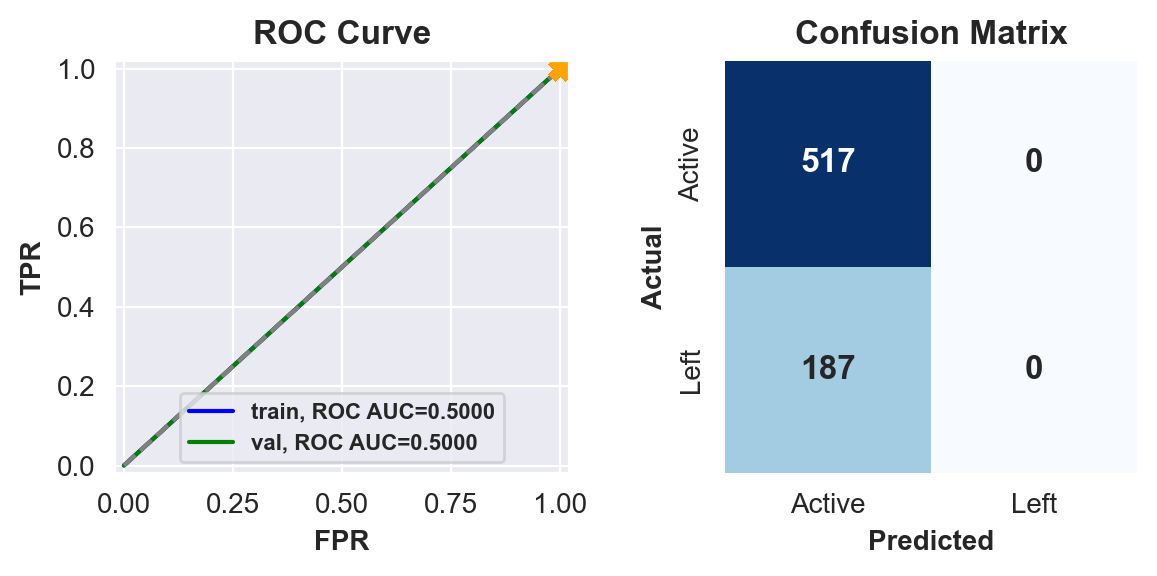

,train,validation
ROC AUC,0.5000,0.5000
Accuracy,0.7345,0.7344


In [91]:
# Evaluamos el modelo y guardamos los resultados
result[model_name] = evaluate_model(best_model[model_name], X_train, y_train, X_val, y_val)

Dado que el modelo constante siempre predice la clase mayoritaria `Active`, las puntuaciones ROC AUC tanto para el conjunto de entrenamiento como para el de validación son 0.5. La precisión es el porcentaje de la clase `Active` en el conjunto de datos correspondiente.

In [92]:
# Creamos la ruta para guardar el modelo
model_path = os.path.join(model_folder, f'{model_name}.pkl')

# Guardamos el modelo
save_model(best_model[model_name], model_path, model_name)

The Constant model has been successfully saved.


[Volver a los contenidos](#back)

#### 7.1.2 Logistic Regression <a id='lr'></a>

El siguiente hiperparámetro será ajustado:

- `C`: El costo de clasificar incorrectamente las etiquetas y es el inverso de la fuerza de regularización. Cuanto mayor sea `C`, más complejo es el modelo y puede llevar al sobreajuste.

In [93]:
# Configuramos el proceso de modelado
model_name = 'Logistic Regression'
opt_model = LogisticRegression

# Creamos el objetivo de Optuna
def objective(trial):
    # Definimos el espacio de búsqueda
    hyperparameters = {        
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
    }
    
    # Entrenamos y evaluamos el modelo
    model = opt_model(**hyperparameters)
    model.fit(X_train_up, y_train_up)
    val_roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    return val_roc_auc

# Número de busquedas para encontrar el mejor modelo
n_trials = 100

In [94]:
%%time
# Buscamos el mejor modelo posible
best_model[model_name], train_time[model_name] = optimise_model(
    opt_model, objective, X_train_up, y_train_up, X_val, y_val, n_trials, model_name
)

Optimising Logistic Regression... :   0%|          | 0/100 [00:00<?, ?it/s]

Best hyperparameters:


{'C': 0.1765910738985753}


CPU times: total: 6.02 s
Wall time: 4.67 s


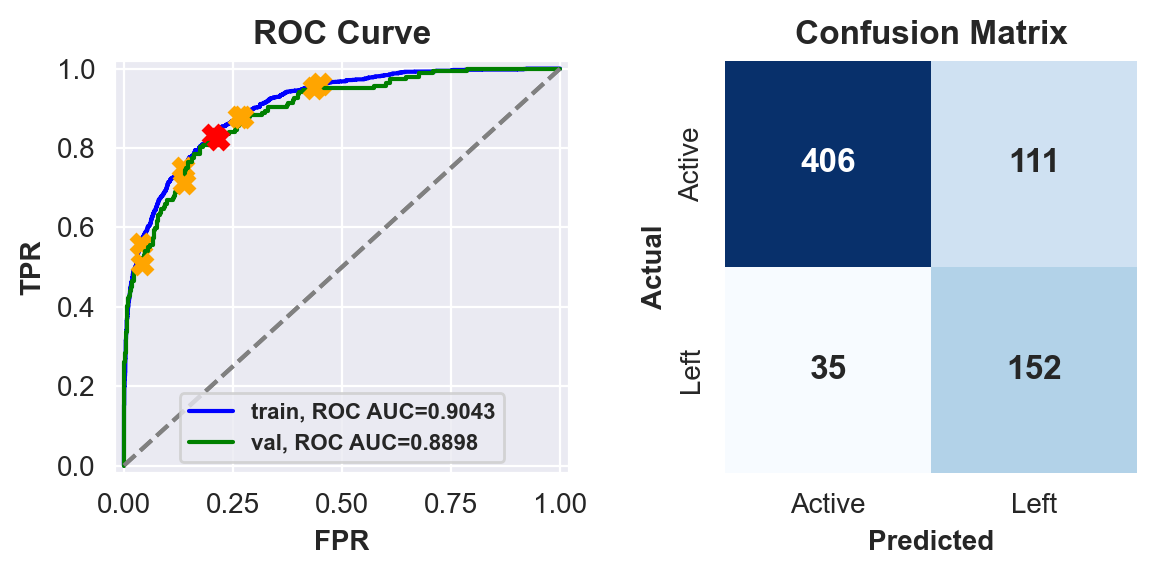

,train,validation
ROC AUC,0.9043,0.8898
Accuracy,0.8138,0.7926


In [95]:
# Evaluamos el modelo y guardamos los resultados
result[model_name] = evaluate_model(best_model[model_name], X_train_up, y_train_up, X_val, y_val)

El modelo de regresión logística tiene una puntuación ROC AUC de validación de 0.8898. A partir de la matriz de confusión, se puede observar que el modelo no tiene un buen rendimiento al predecir la clase mayoritaria `0`.

In [96]:
# Creamos la ruta para guardar el modelo
model_path = os.path.join(model_folder, f'{model_name}.pkl')

# Guardamos el modelo
save_model(best_model[model_name], model_path, model_name)

The Logistic Regression model has been successfully saved.


[Volver a los contenidos](#back)

#### 7.1.3 Decision Tree <a id='dt'></a>

El siguiente hiperparámetro será ajustado:

- `max_depth`: La profundidad máxima del árbol de decisión. Si el valor es demasiado bajo, el modelo podría no generalizar bien. Sin embargo, un valor alto podría causar sobreajuste.

In [97]:
# Configuramos el proceso de modelado
model_name = 'Decision Tree'
opt_model = DecisionTreeClassifier

# Creamos el objetivo de Optuna
def objective(trial):
    # Definimos el espacio de búsqueda
    hyperparameters = {        
        'max_depth': trial.suggest_int('max_depth', 2, 30)
    }
    
    # Entrenamos y evaluamos el modelo
    model = opt_model(**hyperparameters)
    model.fit(X_train_up, y_train_up)
    val_roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    return val_roc_auc

# Número de busquedas para encontrar el mejor modelo
n_trials = 20

In [98]:
%%time
# Buscamos el mejor modelo posible
best_model[model_name], train_time[model_name] = optimise_model(
    opt_model, objective, X_train_up, y_train_up, X_val, y_val, n_trials, model_name
)

Optimising Decision Tree... :   0%|          | 0/20 [00:00<?, ?it/s]

Best hyperparameters:


{'max_depth': 9}


CPU times: total: 719 ms
Wall time: 731 ms


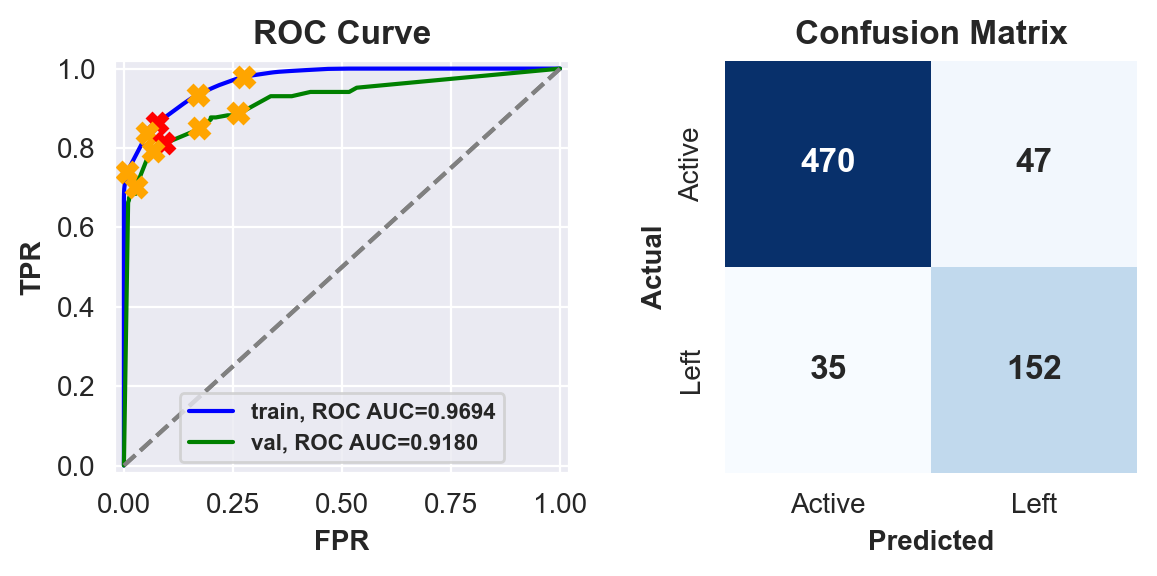

,train,validation
ROC AUC,0.9694,0.9180
Accuracy,0.8928,0.8835


In [99]:
# Evaluamos el modelo y guardamos los resultados
result[model_name] = evaluate_model(best_model[model_name], X_train_up, y_train_up, X_val, y_val)

El modelo de árbol de decisión tiene una puntuación ROC AUC de validación de 0.9235, que es mejor que la del modelo de regresión logística. La mejora se debe a un mejor resultado de predicción en la clase mayoritaria. No obstante, el modelo tiene un problema leve de sobreajuste.

In [100]:
# Creamos la ruta para guardar el modelo
model_path = os.path.join(model_folder, f'{model_name}.pkl')

# Guardamos el modelo
save_model(best_model[model_name], model_path, model_name)

The Decision Tree model has been successfully saved.


[Volver a los contenidos](#back)

#### 7.1.4 LightGBM <a id='lgbm'></a>

Los siguientes hiperparámetros serán ajustados:

- `num_leaves`: La complejidad del modelo aumenta con el número de hojas. Por lo tanto, un número elevado de hojas puede llevar al sobreajuste.
- `max_depth`: La profundidad máxima de un sólo árbol.
- `n_estimators`: El número total de árboles. Este número debe ser lo suficientemente grande para reducir la varianza y evitar que el modelo se sobreajuste. Sin embargo, será computacionalmente costoso para un gran número de árboles.
- `learning_rate`: Este parámetro decide el tamaño del paso del descenso de gradiente en el proceso de optimización. Un valor pequeño puede no encontrar el valor optimizado si el número de árboles no es lo suficientemente grande. Un valor grande acelera la velocidad de entrenamiento, pero puede sobrepasar el valor optimizado.
- `reg_alpha`: La regularización L1 penaliza los pesos grandes en las características y, por lo tanto, previene el sobreajuste. La regularización L1 fomenta la penalización en las características (puede ser que weight=0).
- `reg_lambda`: La regularización L2. Esta regularización L2 es similar a la regularización L1, pero no impone la penalización.

In [101]:
# Configuramos el proceso de modelado
model_name = 'LightGBM'
opt_model = LGBMClassifier

# Creamos el objetivo de Optuna
def objective(trial):
    # Definimos el espacio de búsqueda
    hyperparameters = {       
        'num_leaves': trial.suggest_int('num_leaves', 4, 256),
        'max_depth': trial.suggest_int('max_depth', 5, 500),     
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1e3, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1e3, log=True),        
        'verbose': trial.suggest_int('verbose', -1, -1)
    }
    
   # Entrenamos y evaluamos el modelo
    model = opt_model(**hyperparameters)
    model.fit(X_train_up, y_train_up)
    val_roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    return val_roc_auc

# Número de búsquedas para encontrar el mejor modelo
n_trials = 100

In [102]:
%%time
# Buscamos el mejor modelo posible
best_model[model_name], train_time[model_name] = optimise_model(
    opt_model, objective, X_train_up, y_train_up, X_val, y_val, n_trials, model_name
)

Optimising LightGBM... :   0%|          | 0/100 [00:00<?, ?it/s]

Best hyperparameters:


{'num_leaves': 12,
 'max_depth': 368,
 'n_estimators': 110,
 'learning_rate': 0.4504928825873537,
 'reg_alpha': 1.4637271359056245,
 'reg_lambda': 1.1836742970355332,
 'verbose': -1}


CPU times: total: 2min 22s
Wall time: 31 s


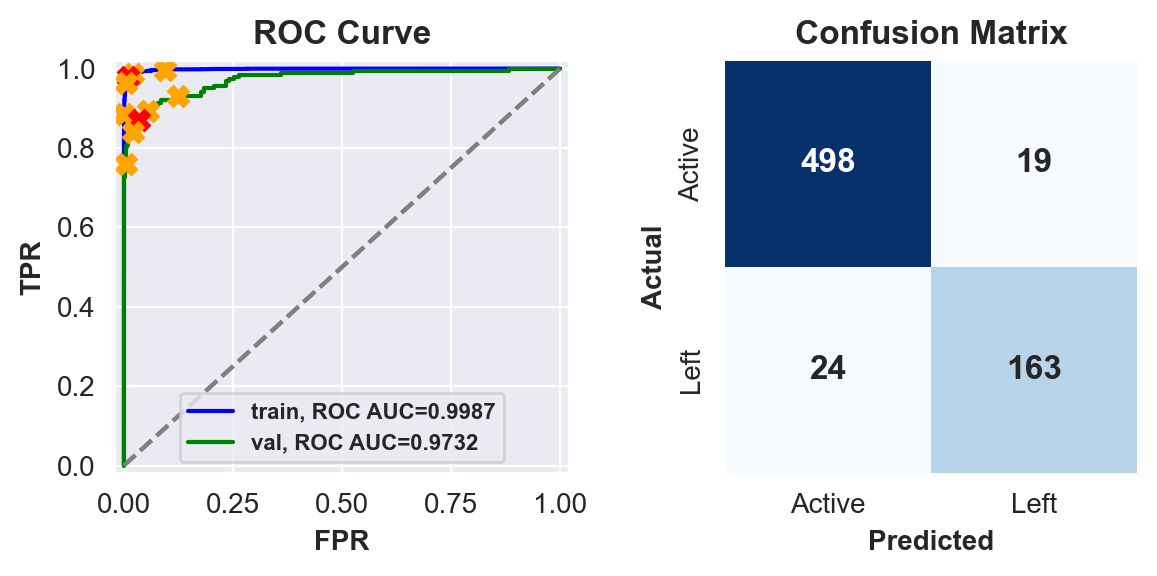

,train,validation
ROC AUC,0.9987,0.9732
Accuracy,0.9843,0.9389


In [103]:
# Evaluamos el modelo y guardamos los resultados
result[model_name] = evaluate_model(best_model[model_name], X_train_up, y_train_up, X_val, y_val)

El modelo LightGBM tiene una excelente puntuación ROC AUC de validación de 0.9732, lo que lo convierte en el mejor modelo en este momento. El rendimiento tanto en las clases mayoritarias como en las minoritarias también ha mejorado. Veamos si los modelos CatBoost y XGBoost pueden superarlo.

In [104]:
# Creamos la ruta para guardar el modelo
model_path = os.path.join(model_folder, f'{model_name}.pkl')

# Guardamos el modelo
save_model(best_model[model_name], model_path, model_name)

The LightGBM model has been successfully saved.


[Volver a los contenidos](#back)

#### 7.1.5 CatBoost <a id='cat'></a>

Los siguientes hiperparámetros serán ajustados:

- `max_depth`
- `n_estimators`
- `learning_rate`
- `reg_lambda`

In [105]:
# Configuramos el proceso de modelado
model_name = 'CatBoost'
opt_model = CatBoostClassifier

# Creamos el objetivo de Optuna
def objective(trial):
    # Definimos el espacio de búsqueda
    hyperparameters = {       
        'max_depth': trial.suggest_int('max_depth', 3, 16),     
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e0, log=True),        
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1e3, log=True),        
        'verbose': trial.suggest_categorical('verbose', [False])
    }
    
    # Entrenamos y evaluamos el modelo
    model = opt_model(**hyperparameters)
    model.fit(X_train_up, y_train_up)
    val_roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    return val_roc_auc

# Número de busquedas para encontrar el mejor modelo
n_trials = 100

In [106]:
%%time
# Buscamos el mejor modelo posible
best_model[model_name], train_time[model_name] = optimise_model(
    opt_model, objective, X_train_up, y_train_up, X_val, y_val, n_trials, model_name
)

Optimising CatBoost... :   0%|          | 0/100 [00:00<?, ?it/s]

Best hyperparameters:


{'max_depth': 3,
 'n_estimators': 295,
 'learning_rate': 0.45671488869248533,
 'reg_lambda': 0.28827128612933073,
 'verbose': False}


CPU times: total: 32min 4s
Wall time: 8min 4s


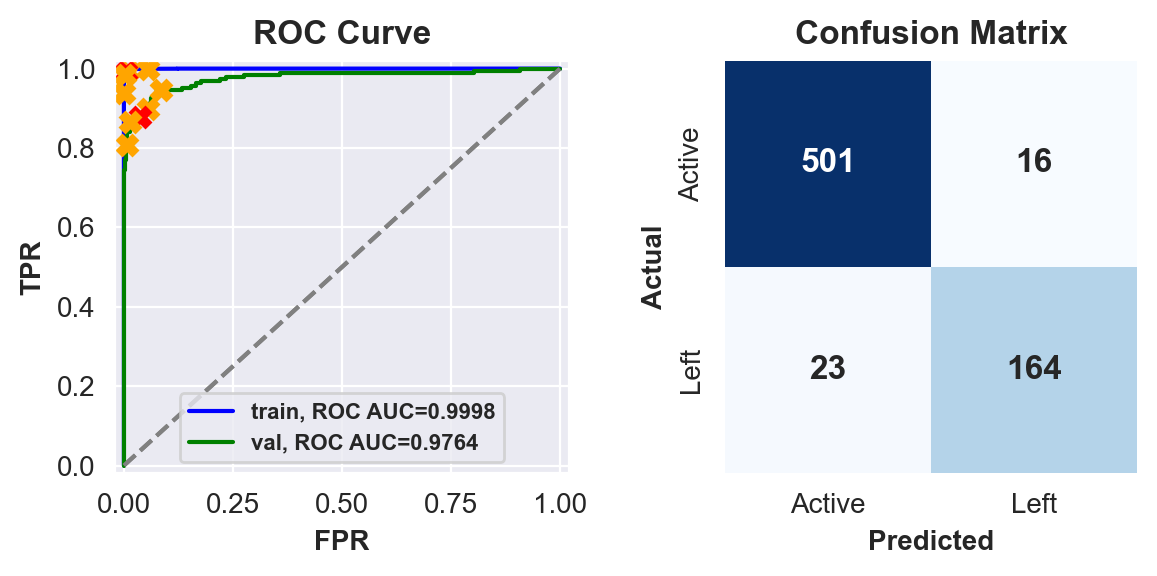

,train,validation
ROC AUC,0.9998,0.9764
Accuracy,0.9935,0.9446


In [107]:
# Evaluamos el modelo y guardamos los resultados
result[model_name] = evaluate_model(best_model[model_name], X_train_up, y_train_up, X_val, y_val)

El modelo CatBoost alcanza una puntuación ROC AUC de validación aún mejor de 0.9764 en comparación con el modelo LightGBM.

In [108]:
# Creamos la ruta para guardar el modelo
model_path = os.path.join(model_folder, f'{model_name}.pkl')

# Guardamos el modelo
save_model(best_model[model_name], model_path, model_name)

The CatBoost model has been successfully saved.


[Volver a los contenidos](#back)

#### 7.1.6 XGBoost <a id='xgb'></a>

Los siguientes hiperparámetros serán ajustados:

- `num_leaves`
- `max_depth`
- `n_estimators`
- `learning_rate`
- `reg_alpha`
- `reg_lambda`

In [109]:
# Configuramos el proceso de modelado
model_name = 'XGBoost'
opt_model = XGBClassifier

# Creamos el objetivo de Optuna
def objective(trial):
    # Definimos el espacio de búsqueda
    hyperparameters = {       
        'num_leaves': trial.suggest_int('num_leaves', 4, 256),
        'max_depth': trial.suggest_int('max_depth', 5, 500),     
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1e3, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1e3, log=True),        
        'verbose': trial.suggest_int('verbose', -1, -1)
    }
    
    # Entrenamos y evaluamos el modelo
    model = opt_model(**hyperparameters)
    model.fit(X_train_up, y_train_up)
    val_roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    return val_roc_auc

# Número de búsquedas para encontrar el mejor modelo
n_trials = 100

In [110]:
%%time
# Buscamos el mejor modelo posible
best_model[model_name], train_time[model_name] = optimise_model(
    opt_model, objective, X_train_up, y_train_up, X_val, y_val, n_trials, model_name
)

Optimising XGBoost... :   0%|          | 0/100 [00:00<?, ?it/s]

Best hyperparameters:


{'num_leaves': 140,
 'max_depth': 8,
 'n_estimators': 287,
 'learning_rate': 0.31852063525572527,
 'reg_alpha': 0.00282970072963123,
 'reg_lambda': 0.004255285377656108,
 'verbose': -1}


CPU times: total: 3min 21s
Wall time: 41.9 s


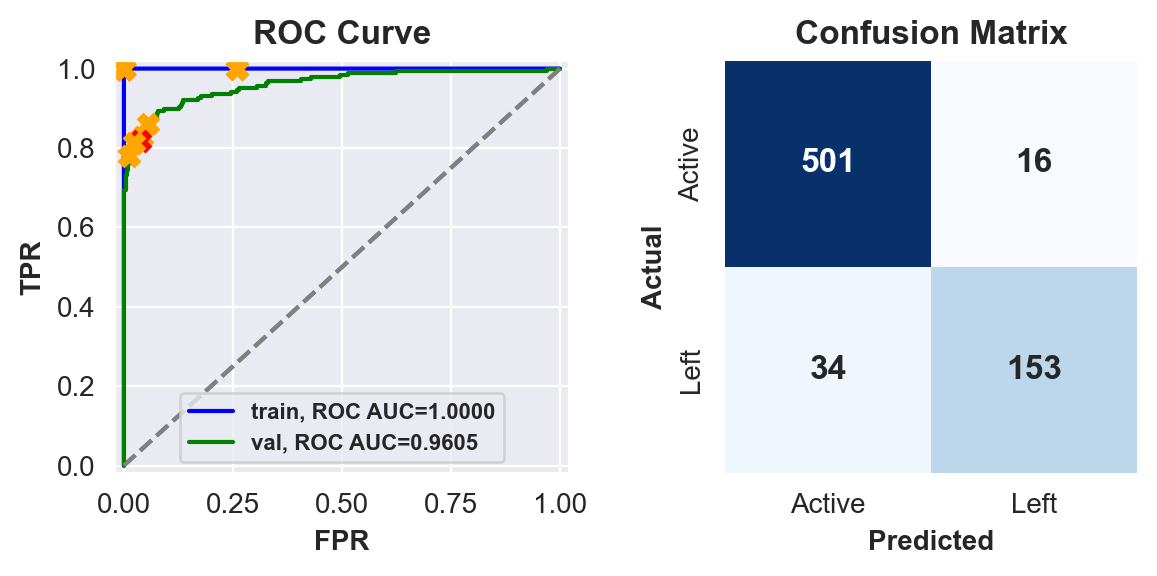

,train,validation
ROC AUC,1.0,0.9605
Accuracy,1.0,0.9290


In [111]:
# Evaluamos el modelo y guardamos los resultados
result[model_name] = evaluate_model(best_model[model_name], X_train_up, y_train_up, X_val, y_val)

El modelo XGBoost tiene una puntuación ROC AUC de validación de 0.9681, que es la más baja entre los tres conjuntos de gradiente de refuerzo.

In [112]:
# Creamos la ruta para guardar el modelo
model_path = os.path.join(model_folder, f'{model_name}.pkl')

# Guardamos el modelo
save_model(best_model[model_name], model_path, model_name)

The XGBoost model has been successfully saved.


[Volver a los contenidos](#back)

## 8. Evaluación del Modelo <a id='model_evaluation'></a>

### 8.1 Selección Final del Modelo <a id='final_model'></a>

Evaluamos los seis modelos para elegir el modelo final.

In [113]:
# Fusionamos los resultados registrados
result_df = pd.merge(
    pd.DataFrame(result).transpose(),
    pd.DataFrame([train_time]).transpose().rename(columns={0: 'training_time (ms)'}),
    left_index = True,
    right_index = True
).sort_values('val_roc_auc', ascending=False)

# Echamos un vistazo al resultado
result_df

,train_roc_auc,val_roc_auc,train_acc,val_acc,prediction_time (ms),training_time (ms)
CatBoost,0.9998,0.9764,0.9935,0.9446,2.00,680.19
LightGBM,0.9987,0.9732,0.9843,0.9389,2.99,58.84
XGBoost,1.0000,0.9605,1.0000,0.9290,10.97,311.19
Decision Tree,0.9694,0.9180,0.8928,0.8835,1.00,29.92
Logistic Regression,0.9043,0.8898,0.8138,0.7926,1.97,42.40
Constant,0.5000,0.5000,0.7345,0.7344,0.00,1.00


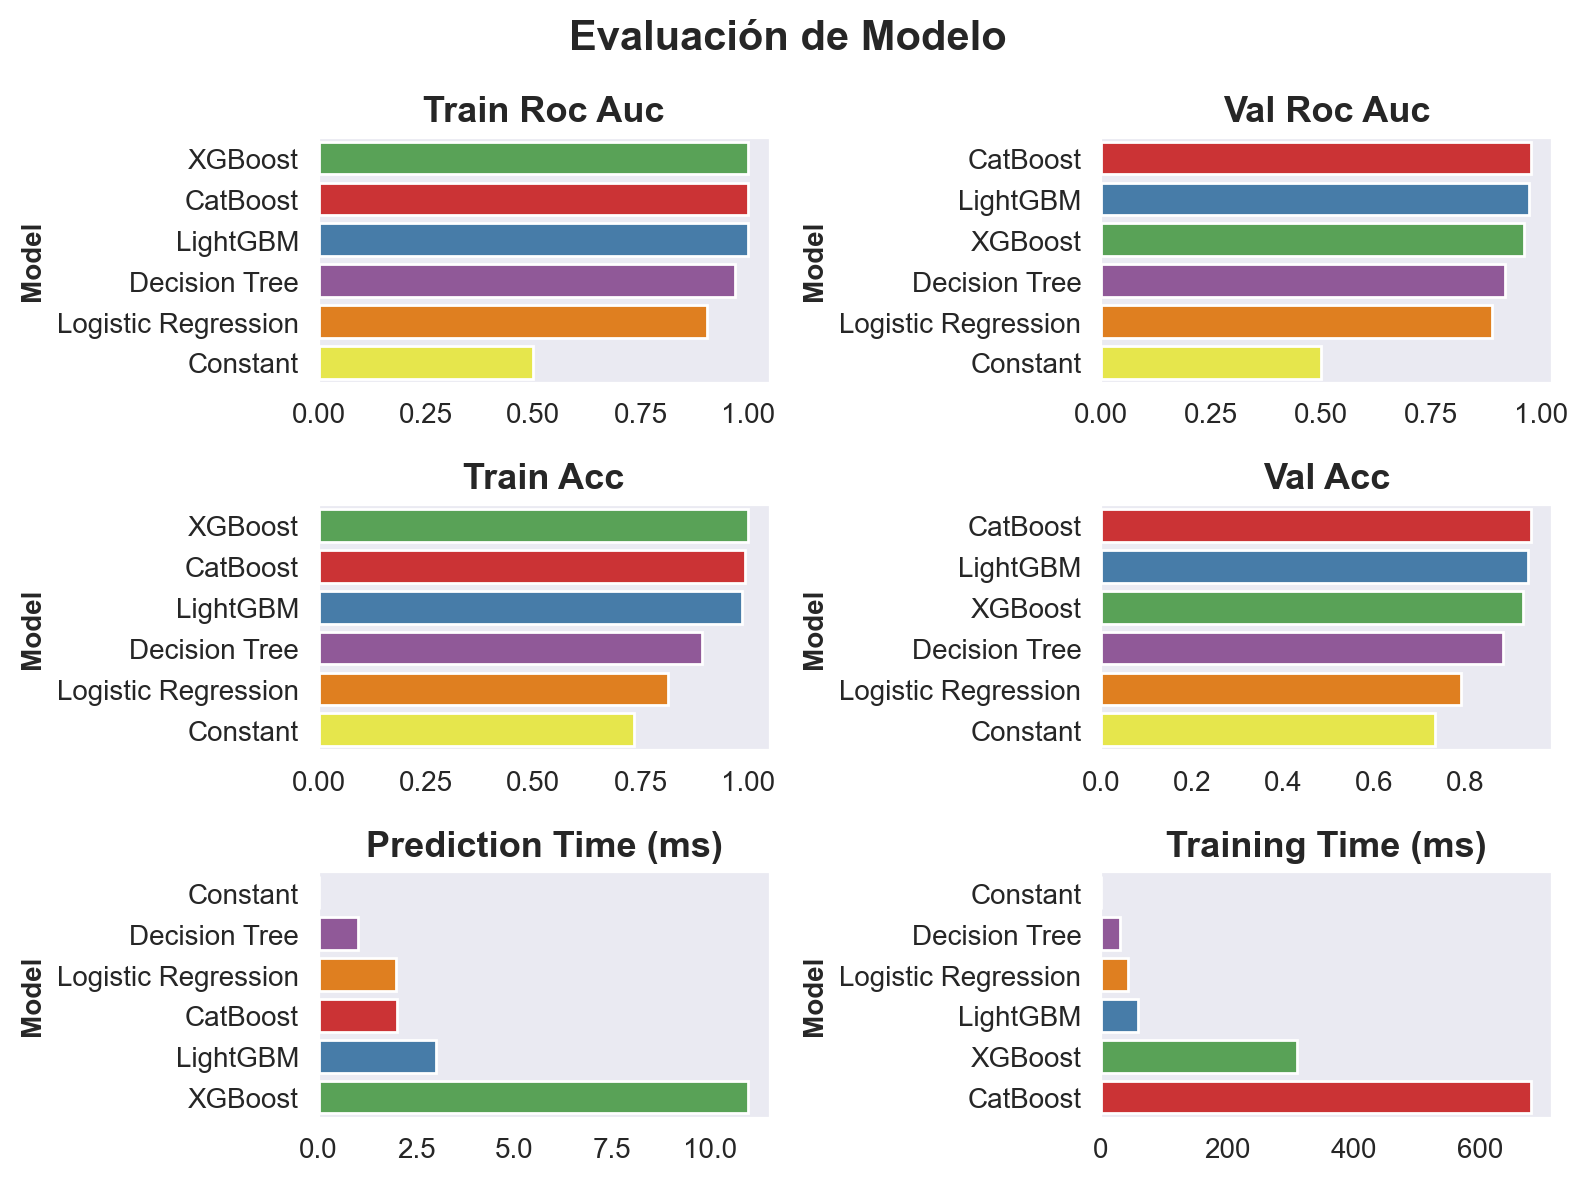

In [122]:
# Graficamos para visualizar el resultado
nrows, ncols = 3, 2
sns.set_style('dark')

fig, axs = plt.subplots(nrows, ncols, figsize=(8, 6))

fig.suptitle('Evaluación de Modelo', fontsize=15, fontweight='bold')

# Asignamos un color específico para cada modelo
colors = sns.color_palette('Set1')
model_colors = {}
for i, model in enumerate(result_df.index):
    color = colors[i % len(colors)]
    model_colors[model] = color

# Graficamos
for i in range(nrows):
    for j in range(ncols):
        col = result_df.columns[i*ncols + j]
        if 'time' in col:
            col_data = result_df[col].sort_values()
        else:
            col_data = result_df[col].sort_values(ascending=False)

        ax = axs[i][j]
        sns.barplot(y=col_data.index, x=col_data.values, hue=col_data.index, palette=model_colors, ax=ax)
        title = ' '.join([word.capitalize() for word in col.split('_')])
        ax.set_title(title, fontsize=13, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('Model', fontweight='bold')

plt.tight_layout()
plt.show()

**Evaluación del modelo**

- Todos los modelos superan al modelo constante de referencia. En particular, los gradient boosting ensembles muestran un rendimiento superior en comparación con otros modelos.
- Cada modelo muestra un sobreajuste leve a moderado, especialmente los modelos XGBoost y de decision tree.
- En términos de tiempo, el modelo XGBoost requiere más tiempo para las predicciones que los otros modelos, mientras que el modelo CatBoost tiene la duración de entrenamiento más larga.
- **El modelo CatBoost, que tiene la puntuación ROC AUC de validación más alta de 0.9764, se elige como el modelo final. Además, el modelo también tiene el tiempo de predicción más rápido entre los tres gradient boosting ensembles.**

[Volver a los contenidos](#back)

### 8.2 Importancia de los Features  <a id='feature_importances'></a>

Echamos un vistazo a las importancias de los features para predecir la cancelación de clientes según el modelo CatBoost.

In [115]:
# Encontramos las importancias de los features devueltas por el modelo CatBoost
feature_importance = pd.DataFrame({
    'feature': best_model['CatBoost'].feature_names_,
    'feature_importance': best_model['CatBoost'].feature_importances_
}).sort_values('feature_importance', ascending=False)

# Mostramos los principales 10 features
feature_importance.head(10)

,feature,feature_importance
3,subscribed_days,43.135762
4,subscribed_years,31.532392
1,total_charges,11.100803
0,monthly_charges,5.698314
15,internet_service_Fiber optic,2.114078
26,streaming_tv_not_subscribed,1.004433
7,type_Two year,0.795823
5,total_internet_services,0.441417
6,type_One year,0.441076
10,payment_method_Electronic check,0.400360


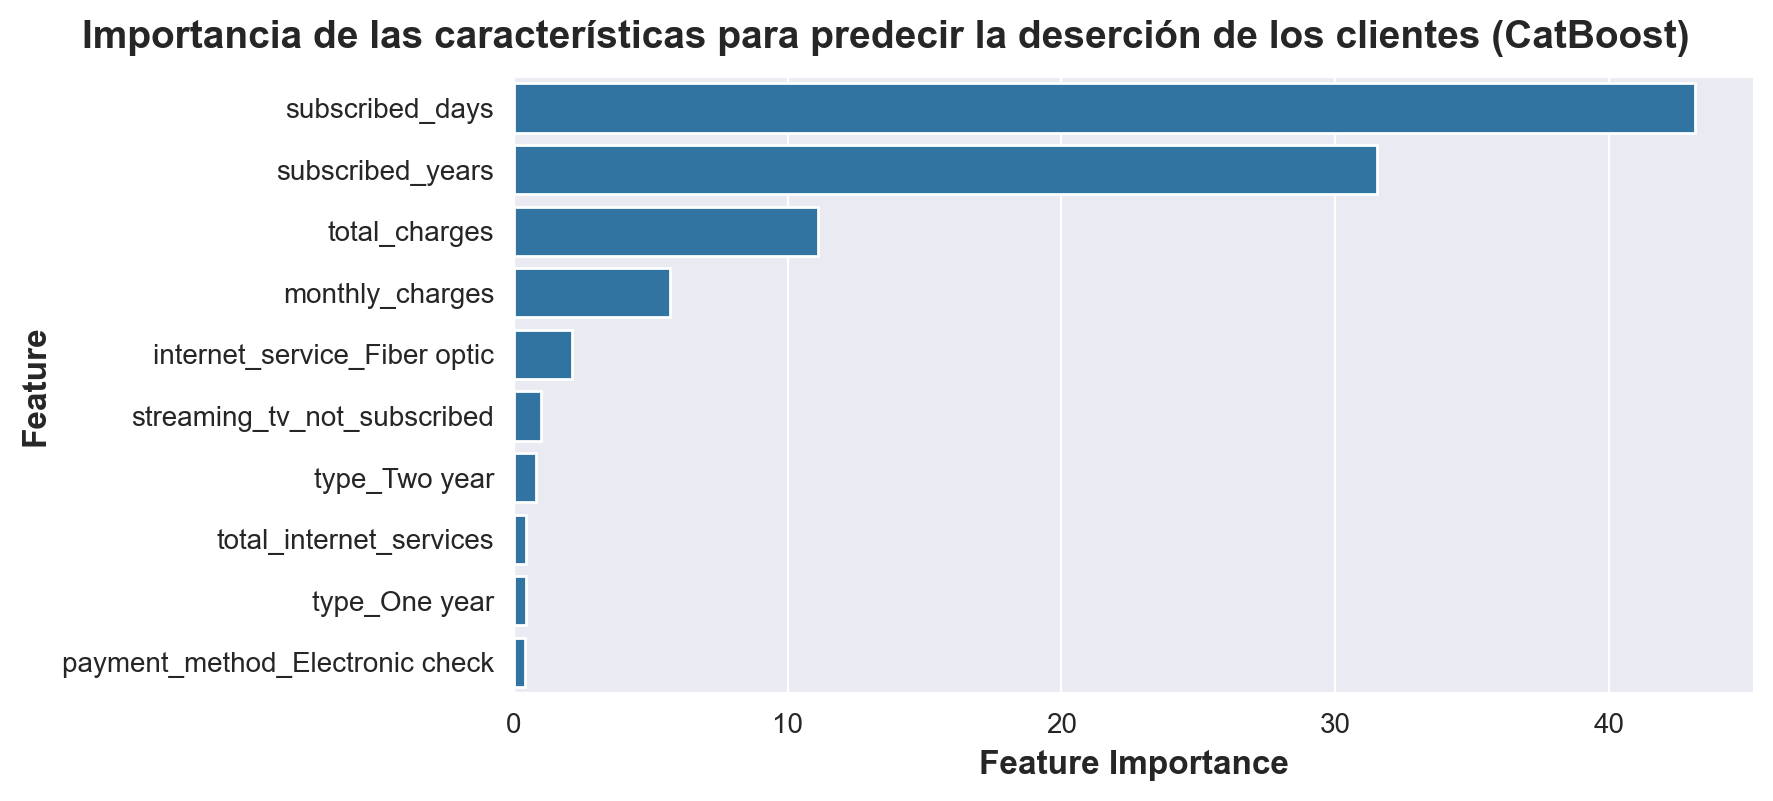

In [121]:
# Graficamos para visualizar las 10 features principales
sns.set_style('darkgrid')
plt.figure(figsize=(8, 4))

sns.barplot(data=feature_importance[:10], y='feature', x='feature_importance')
plt.title('Importancia de las características para predecir la deserción de los clientes (CatBoost)', x=0.3, y=1.02, fontsize=14, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')

plt.show()

Las features `subscribed_days`, `subscribed_years`, `total_charges`, `monthly_charges` y `internet_service_Fiber optic` son cinco de las más importantes para predecir la cancelación de clientes.

[Volver a los contenidos](#back)

### 8.3 Evaluación del Modelo Final en el Conjunto de Prueba <a id='test_evaluation'></a>

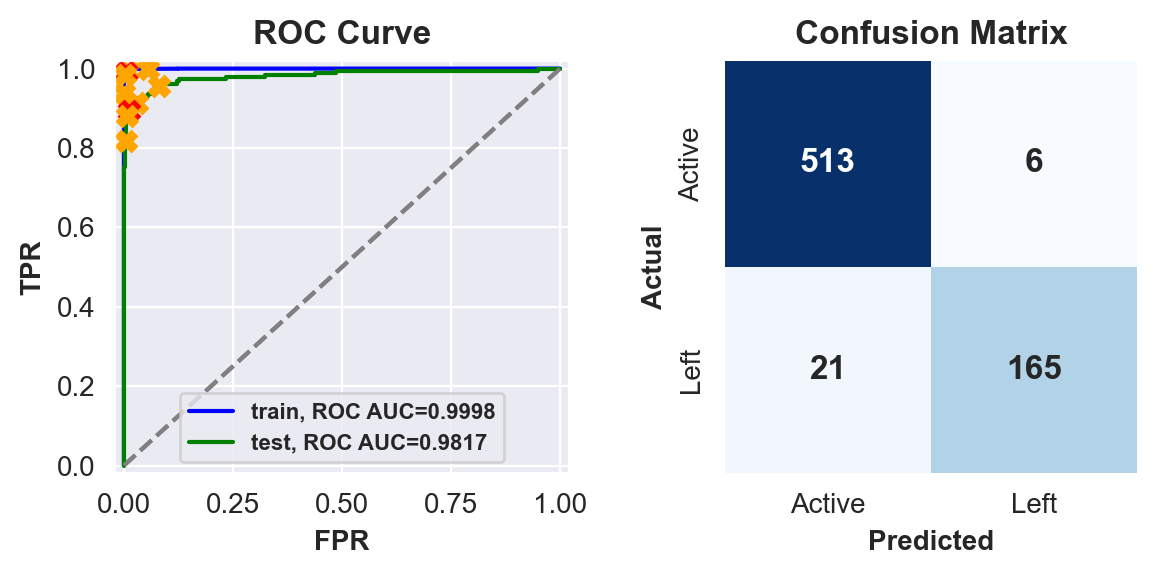

,train,test
ROC AUC,0.9998,0.9817
Accuracy,0.9935,0.9617


In [117]:
# Evaluamos el modelo final en el conjunto de prueba
evaluate_model(best_model['CatBoost'], X_train_up, y_train_up, X_test, y_test, test_set=True)

El modelo CatBoost mantiene un rendimiento consistente en el conjunto de prueba con una puntuación ROC AUC de 0.9817 y una precisión de 0.9617. Sin embargo, el modelo muestra resultados menos satisfactorios en la predicción de la clase minoritaria `Left`. Para verificar esto, examinaremos el informe de clasificación.

In [118]:
# Imprimimos el reporte de clasificación de CatBoost
print(classification_report(y_test, best_model['CatBoost'].predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       519
           1       0.96      0.89      0.92       186

    accuracy                           0.96       705
   macro avg       0.96      0.94      0.95       705
weighted avg       0.96      0.96      0.96       705



Al comparar el `recall` y el `f1-score`, es evidente que el modelo CatBoost presenta un rendimiento ligeramente inferior en la predicción de la clase minoritaria.

In [119]:
# Comprobamos el modelo LGBM con un regression model
base_roc_auc = roc_auc_score(y_test, best_model['Constant'].predict(X_test))
cat_roc_auc = roc_auc_score(y_test, best_model['CatBoost'].predict(X_test))

print('The CatBoost model outperforms the linear regression model on test set by ', end='')
print(f'{(cat_roc_auc / base_roc_auc) - 1:.2%}')

The CatBoost model outperforms the linear regression model on test set by 87.55%


[Volver a los contenidos](#back)

## 9. Conclusiones Generales <a id='general_conclusion'></a>

**Exploración de Datos**

El equipo de marketing del operador Interconnect nos ha proporcionado cuatro Datasets: `contract`, `personal`, `internet` y `service`. Estos Datasets registran información sobre 7043 clientes. Después de investigar los Datasets, se han detectado los siguientes problemas:


- Todos los nombres de las columnas están en formato `camel case`.
- La columna `EndDate` tiene algunos valores de `No` que no son fechas.
- La columna `TotalCharges` tiene valores ` ` no-numéricos que indican que los clientes son nuevos.
- Los tipos de datos de `BeginDate`, `EndDate` y `TotalCharges` son incorrectos.

**Preprocesamiento de Datos**

En esta etapa, los conjuntos de datos han sido manipulados y limpiados de las siguientes maneras:

- Se fusionaron los cuatro Datasets basándose en la columna común `customerID`y se llenaron los valores faltantes en `InternetService` y `MultipleLines` con `not_subcribed`.
- Se convirtieron los nombres de las columnas a formato de `snake case`.
- Se creó la variable objetivo `churn` a partir de la columna `end_date`.
- Se reemplazaron los valores `No` en `end_date` por `None` y los valores ` ` en `total_charges` por `0`.
- Se convirtieron los tipos de datos de `begin_date` y `end_date` a `datetime`, y el tipo de dato de `total_charges` a `float`.
- Se añadió el `monthly_payment` al `total_charges`, ya que los registros actuales no reflejan el cargo del mes en curso.

Además de eso, se han creado cuatro características adicionales en el proceso de ingeniería de características:

- `subscribed_days` y `subscribed_years`: Creados a partir de `begin_date` y `end_date`.
- `subscribed_service`: Tipo de servicio suscrito (servicio de comunicación por línea fija, servicio de internet o ambos).
- `total_internet_services`: Calculando el número de servicios de internet adicionales a partir de `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, y `streaming_movies`.

**Análisis Exploratorio de Datos (EDA)**

Después de analizar las características y comportamientos de los clientes, se han sacado las siguientes conclusiones:

1. Los clientes que han abandonado tienden a tener un pago mensual más alto. Los clientes con un pago mensual de `70-110` tienen una tasa de cancelación más alta del 36.79% en comparación con otros clientes.
2. La mayoría de los clientes (68.65%) se suscribieron tanto al servicio de comunicación por línea fija como al servicio de internet.
3. Aunque hubo un gran aumento en el número de clientes adquiridos desde Septiembre del 2019, el número de clientes que se fueron fue el doble que el de los que se unieron.
4. Entre los usuarios de servicios de internet, la fibra óptica es la opción principal, pero la tasa de cancelación de este servicio también es significativamente más alta en comparación con los usuarios de DSL.
5. Los clientes que utilizan únicamente el servicio de comunicación por línea fija tienen una duración de suscripción ligeramente más corta.
6. La tasa de cancelación entre los clientes con contratos mes a mes es al menos cuatro veces mayor que las tasas de cancelación de los otros dos grupos.
7. Aunque la tasa de cancelación es más alta entre los usuarios que se suscriben a ambos servicios, los clientes tienen menos probabilidades de abandonar cuando se suscriben a más servicios de internet adicionales.
8. La tasa de cancelación entre los clientes que utilizan cheque electrónico y facturación sin papel para realizar el pago es el doble de la tasa de cancelación entre los clientes que utilizan otros métodos de pago.
9. Las personas mayores tienen más probabilidades de abandonar al operador. Por otro lado, los clientes con pareja o dependientes tienen menos probabilidades de cancelar los servicios.
10. Cuanto mayor sea la duración de la suscripción, menor será la probabilidad de que el cliente abandone al operador.
11. Las clases objetivo están desequilibradas, con un 73.46% de clientes activos y un 26.54% de clientes que han abandonado.

**Modelamiento**

Antes de entrenar los modelos, se codificaron las características categóricas y se realizó el escalado de características en las características numéricas. Dado que el conjunto de datos está desequilibrado en cuanto a las clases objetivo, la clase minoritaria en el conjunto de entrenamiento se sobre-muestreó. Se han desarrollado un total de seis modelos, incluidos el modelo constante, logistic regression, decision tree, LightGBM, CatBoost y XGBoost. Se ajustaron hiperparámetros específicos para cada modelo.

**Evaluación de Modelo**

Todos los modelos superan al modelo constante de referencia y logran una puntuación mínima de ROC AUC de 0.85, como se requería. El modelo **CatBoost, que tiene la puntuación de validación ROC AUC más alto de 0.9764, se elige como el modelo final. Además, el modelo también tiene el tiempo de predicción más rápido entre los tres gradient boosting ensembles**. Para el modelo CatBoost, las cinco características principales para predecir la cancelación de clientes son `subscribed_days`, `subscribed_years`, `total_charges`, `monthly_charges` e `internet_service_Fiber optic`. Sin embargo, el modelo CatBoost tiene un rendimiento ligeramente inferior en la predicción de los clientes que se van.


[Volver a los contenidos](#back)

## 10. Recomendaciones <a id='recommendations'></a>

Para futuros trabajos,

1. Dado que hemos descubierto que las personas mayores son más propensas a cancelar, podríamos recopilar datos sobre la edad de los clientes e investigar si la tasa de cancelación está relacionada con la edad. Esto podría mejorar el rendimiento del modelo.
2. Recopilar algunos otros datos demográficos como nivel educativo, ocupación, área de residencia, etc., para realizar un análisis más profundo.
3. Para abordar el problema de rendimiento en la predicción de la clase minoritaria (los clientes que se van), podríamos probar las siguientes técnicas:
    - Aplica el hiperparámetro `class weight` en el clasificador para penalizar al modelo por clasificar incorrectamente la clase minoritaria.
    - Utilizar técnicas de re-muestreo más avanzadas como ADASYN, SMOTETomek, etc.
4. Experimentar con otros modelos o combinar las predicciones de varios modelos mediante un ensamblaje por apilamiento (stacking ensemble).

[Volver a los contenidos](#back)